In [1]:
import pandas as pd
import glob
import scipy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
sc.set_figure_params(figsize=(5,5)) # no blurry figures allowed
sc.settings.verbosity = 4  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')

import sys
sys.path.append('../../code/')
sys.path.append('./code/')

from aux_functions import *
from old_make_figures import *
from get_lfcs import generate_lfcs
from plotting_functions import *
import matplotlib.gridspec as gridspec

plt.rcParams['pdf.fonttype'] = 42

Initializing different lists of columns to fetch columns later on

In [2]:
resting_reintro_cols = ['weiReintro_nKIKO.0.0.n_vs_nKIKO.0.0.p', 'weiReintro_nKIKO.3.0.n_vs_nKIKO.3.0.p', 'weiReintro_nKIKO.7.0.n_vs_nKIKO.7.0.p', 'weiReintro_nKIKO.14.0.n_vs_nKIKO.14.0.p', 'weiReintro_nKIKO.28.0.n_vs_nKIKO.28.0.p',]
active_reintro_cols = ['weiReintro_aKIKO.0.0.n_vs_aKIKO.0.0.p', 'weiReintro_aKIKO.3.0.n_vs_aKIKO.3.0.p', 'weiReintro_aKIKO.7.0.n_vs_aKIKO.7.0.p', 'weiReintro_aKIKO.14.0.n_vs_aKIKO.14.0.p', 'weiReintro_aKIKO.28.0.n_vs_aKIKO.28.0.p',]
resting_reintro_cols = ['weiReintro_nKIKO.0.0.n_vs_nKIKO.0.0.p', 'weiReintro_nKIKO.3.0.n_vs_nKIKO.3.0.p', 'weiReintro_nKIKO.7.0.n_vs_nKIKO.7.0.p', 'weiReintro_nKIKO.14.0.n_vs_nKIKO.14.0.p', 'weiReintro_nKIKO.28.0.n_vs_nKIKO.28.0.p',]
active_reintro_cols = ['weiReintro_aKIKO.0.0.n_vs_aKIKO.0.0.p', 'weiReintro_aKIKO.3.0.n_vs_aKIKO.3.0.p', 'weiReintro_aKIKO.7.0.n_vs_aKIKO.7.0.p', 'weiReintro_aKIKO.14.0.n_vs_aKIKO.14.0.p', 'weiReintro_aKIKO.28.0.n_vs_aKIKO.28.0.p',]
wei_sc_cols_d0 = ['sc_rest_D0_tir1_vs_D0_wt', 'sc_active_D0_tir1_vs_D0_wt']
wei_sc_cols_d3 = ['sc_rest_D3_tir1_vs_D3_wt', 'sc_active_D3_tir1_vs_D3_wt']
wei_sc_cols_d7 = ['sc_rest_D7_tir1_vs_D7_wt', 'sc_active_D7_tir1_vs_D7_wt']
wei_new_cols = ['weiNew_tir1_d3_vs_wt_d3', 'weiNew_tir1_d7_vs_wt_d7']
sc_cols = ['D0_tir1_vs_D0_wt Rest', 'D3_tir1_vs_D3_wt Rest', 'D7_tir1_vs_D7_wt Rest', 'D0_tir1_vs_D0_wt Actv', 'D3_tir1_vs_D3_wt Actv', 'D7_tir1_vs_D7_wt Actv']
wei_cols = ['wei_Thymus.TIR1.Developing_vs_Thymus.WT.Developing', 'wei_SpleenLN.TIR1.Resting_vs_SpleenLN.WT.Resting', 'wei_SpleenLN.TIR1.Activated_vs_SpleenLN.WT.Activated',]
joris_cols = ['joris_CD73__Thymic_Foxp3_GFPKO_vs_CD73__Thymic_Treg',  'joris_resting_Foxp3_GFPKO_vs_resting_Treg_GFP_DTR_WT', 'joris_activated_Foxp3_GFPKO_vs_activated_Treg_GFP_DTR_WT',]

col_to_name = {
 'joris_CD73__Thymic_Foxp3_GFPKO_vs_CD73__Thymic_Treg' : 'Joris Thymus',
 'joris_activated_Foxp3_GFPKO_vs_activated_Treg_GFP_DTR_WT' : 'Joris Active',
 'joris_resting_Foxp3_GFPKO_vs_resting_Treg_GFP_DTR_WT' : 'Joris Resting',
}

col_to_name.update({
 'wei_Thymus.TIR1.Developing_vs_Thymus.WT.Developing' :     'Thymus.TIR1',
 'wei_SpleenLN.TIR1.Activated_vs_SpleenLN.WT.Activated' :     'active.TIR1',
 'wei_SpleenLN.TIR1.Resting_vs_SpleenLN.WT.Resting' :     'resting.TIR1',
 'sc_rest_D0_tir1_vs_D0_wt' :     'D0_sc_rest',
 'sc_active_D0_tir1_vs_D0_wt' :     'D0_sc_active',
 'sc_rest_D3_tir1_vs_D3_wt' :     'D3_sc_rest',
 'sc_active_D7_tir1_vs_D7_wt' :     'D7_sc_active',
 'sc_active_D3_tir1_vs_D3_wt' :     'D3_sc_active',
 'sc_rest_D7_tir1_vs_D7_wt'  :     'D7_sc_rest',
 'weiReintro_nKIKO.0.0.n_vs_nKIKO.0.0.p' : 'Reintro D0 Resting',
 'weiReintro_nKIKO.3.0.n_vs_nKIKO.3.0.p' : 'Reintro D3 Resting',
 'weiReintro_nKIKO.7.0.n_vs_nKIKO.7.0.p' : 'Reintro D7 Resting',
 'weiReintro_nKIKO.14.0.n_vs_nKIKO.14.0.p' : 'Reintro D14 Resting',
 'weiReintro_nKIKO.28.0.n_vs_nKIKO.28.0.p' : 'Reintro D28 Resting',
 'weiReintro_aKIKO.0.0.n_vs_aKIKO.0.0.p' : 'Reintro D0 Active',
 'weiReintro_aKIKO.3.0.n_vs_aKIKO.3.0.p' : 'Reintro D3 Active',
 'weiReintro_aKIKO.7.0.n_vs_aKIKO.7.0.p' : 'Reintro D7 Active',
 'weiReintro_aKIKO.14.0.n_vs_aKIKO.14.0.p' : 'Reintro D14 Active',
 'weiReintro_aKIKO.28.0.n_vs_aKIKO.28.0.p' : 'Reintro D28 Active',
 'weiNew_tir1_d7_vs_wt_d7' : 'NewBulk D7',
 'weiNew_tir1_d3_vs_wt_d3' : 'NewBulk D3',
})

Initializing chromosomes

In [3]:
%load_ext autoreload 
from aux_functions import *
PARSED_CHROMS_nochr = {'1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'X'}
PARSED_CHROMS = {'chr' + x for x in PARSED_CHROMS_nochr}

In [4]:
from init_bulk_ATAC import *
from checkATACEnrichments import *

In [5]:
CLUSTER_TO_COLOR = {x: sns.color_palette('tab10')[x] for x in range(10)}
CLUSTERS_TO_PLOT = [0, 1, 2, 3]

### Load RNA-seq data

Bulk Tir1 RNA-seq

In [6]:
from init_bulk_RNA import *

lfc_df, pval_df, basemean_df, wald_df = load_lfc_and_pval_df('./bulk_rna_data/DESeq2/output/wei[R _]*thresh=0.csv')

RNA-seq from Veeken et al. 2020 (https://pubmed.ncbi.nlm.nih.gov/33176163/)

In [7]:
from init_bulk_RNA import *

joris_lfc_df, joris_pval_df, joris_basemean_df, joris_wald_df = load_lfc_and_pval_df('./bulk_rna_data/DESeq2/output/joris*thresh=0.csv')

scRNA LFCs

In [8]:
sc_rna_lfc_df, sc_rna_pval_df, sc_rna_basemean_df, sc_rna_wald_df = load_lfc_and_pval_df('./bulk_rna_data/DESeq2/output/scFINAL*thresh=0.csv')

### Renaming columns for simplicity
for df in [sc_rna_lfc_df, sc_rna_pval_df, sc_rna_basemean_df, sc_rna_wald_df]:
    df.columns = [x.replace('scFINAL', 'sc') for x in df.columns]

Here we combine the data from all the different experiments into joint dataframes

In [9]:
def concatenate_rna_matrices():
    basemean_df_all = pd.concat([joris_basemean_df.fillna(-1), basemean_df.fillna(-1), 
                                 sc_rna_basemean_df.fillna(-1),
                                ], axis=1).copy()
    
    good_inds = basemean_df_all.index
    
    
    pval_df_all = pd.concat([joris_pval_df, pval_df, sc_rna_pval_df], 
                            axis=1).copy()
    pval_df_all = pval_df_all.loc[good_inds]
    pval_df_all[basemean_df_all < 0] = np.nan
    
    
    lfc_df_all = pd.concat([joris_lfc_df, lfc_df, sc_rna_lfc_df], axis=1).copy()
    lfc_df_all = lfc_df_all.loc[good_inds]
    
    wald_df_all = pd.concat([joris_wald_df, wald_df, sc_rna_wald_df], axis=1).copy()
    wald_df_all = wald_df_all.loc[good_inds]
    wald_df_all[basemean_df_all < 0] = np.nan

    return basemean_df_all, lfc_df_all, wald_df_all, pval_df_all

In [10]:
basemean_df_all, lfc_df_all, wald_df_all, pval_df_all = concatenate_rna_matrices()

Here we filter out genes that are not highly expressed in any condition

In [11]:
## Filter genes by read count so that all matrices have the same number of genes
ALL_RESTING_COLS = ['wei_SpleenLN.TIR1.Resting_vs_SpleenLN.WT.Resting', 'sc_rest_D3_tir1_vs_D3_wt', 
                    'sc_rest_D7_tir1_vs_D7_wt', 
                    'joris_resting_Foxp3_GFPKO_vs_resting_Treg_GFP_DTR_WT', 'sc_rest_D0_tir1_vs_D0_wt'] + resting_reintro_cols
ALL_ACTIVE_COLS = ['wei_SpleenLN.TIR1.Activated_vs_SpleenLN.WT.Activated', 'sc_active_D3_tir1_vs_D3_wt', 
                    'sc_active_D7_tir1_vs_D7_wt', 'sc_active_D0_tir1_vs_D0_wt',
                   'joris_activated_Foxp3_GFPKO_vs_activated_Treg_GFP_DTR_WT'] + active_reintro_cols
ALL_THYMIC_COLS = ['wei_Thymus.TIR1.Developing_vs_Thymus.WT.Developing', 'joris_CD73__Thymic_Foxp3_GFPKO_vs_CD73__Thymic_Treg']


## Filter by basemean for each "cell state" separately
gene_prop = (5e-6)
genes_with_enough_reads = (basemean_df_all/(basemean_df_all.sum(axis=0)) > gene_prop)
RESTING_GENES = basemean_df_all.index[genes_with_enough_reads[ALL_RESTING_COLS].any(axis=1)]
ACTIVE_GENES = basemean_df_all.index[genes_with_enough_reads[ALL_ACTIVE_COLS].any(axis=1)]
THYMIC_GENES = basemean_df_all.index[genes_with_enough_reads[ALL_THYMIC_COLS].any(axis=1)]

print("# RESTING Genes:", len(RESTING_GENES))
print("# ACTIVE Genes:", len(ACTIVE_GENES))
print("# THYMIC Genes:", len(THYMIC_GENES))

### Concatenate the genes with enough reads to form the final matrix
pval_df_all = pd.concat([pval_df_all.loc[RESTING_GENES, ALL_RESTING_COLS], 
                         pval_df_all.loc[ACTIVE_GENES, ALL_ACTIVE_COLS], 
                         pval_df_all.loc[THYMIC_GENES, ALL_THYMIC_COLS]], 
                        axis=1)
basemean_df_all = pd.concat([basemean_df_all.loc[RESTING_GENES, ALL_RESTING_COLS], 
                             basemean_df_all.loc[ACTIVE_GENES, ALL_ACTIVE_COLS], 
                             basemean_df_all.loc[THYMIC_GENES, ALL_THYMIC_COLS]], 
                             axis=1
                           )
lfc_df_all = pd.concat([lfc_df_all.loc[RESTING_GENES, ALL_RESTING_COLS], 
                        lfc_df_all.loc[ACTIVE_GENES, ALL_ACTIVE_COLS], 
                        lfc_df_all.loc[THYMIC_GENES, ALL_THYMIC_COLS]], 
                        axis=1
                      )
wald_df_all = pd.concat([wald_df_all.loc[RESTING_GENES, ALL_RESTING_COLS], 
                         wald_df_all.loc[ACTIVE_GENES, ALL_ACTIVE_COLS], 
                         wald_df_all.loc[THYMIC_GENES, ALL_THYMIC_COLS]], 
                         axis=1
                       )




# RESTING Genes: 11237
# ACTIVE Genes: 11440
# THYMIC Genes: 10678


#### Import all TSS

Here we import TSSs from mm39 for analysis of epigenetic data

In [12]:
import liftover
from liftover_functions import liftover_bedtool
from gtf_functions import make_tss_df

In [13]:
gtf_file = pbt.BedTool('bulk_rna_data/annotations/gencode.vM30.annotation.gtf')
transcripts_file = gtf_file.filter(lambda b: b[2] == 'transcript').saveas()
tss_df, transcript_df = make_tss_df(transcripts_file)
tss_df = tss_df.loc[~(tss_df['support_level'] == 'NA') & (tss_df['transcript_type'] == 'protein_coding')]
tss_df['support_level'] = tss_df['support_level'].astype(int)
tss_df = tss_df.sort_values("support_level").drop_duplicates("gene_name")
transcript_df = transcript_df[transcript_df['transcript_id'].isin(tss_df.transcript_id)]

Remove TSSs which are not present to high levels in our RNA-seq data, and which are mitochondrial

In [14]:
high_readcount_genes = basemean_df_all.index
high_readcount_genes = high_readcount_genes[~high_readcount_genes.str.contains("mt-")]
high_readcount_tss_df = tss_df[tss_df['gene_name'].isin(high_readcount_genes)]
high_readcount_tss_df = high_readcount_tss_df.set_index('gene_name')

### Load peaks for epigenetic analysis 

Load Foxp3 peaks and liftover to mm39

In [15]:
## From Konopacki et al. 2019
foxp3_peaks_konopacki = pbt.BedTool('../../peaks/foxp3/peaks_yuri.txt')

# Liftover to mm39 (TSS/transcripts are mm39)
foxp3_bedtool_liftover = liftover_bedtool(foxp3_peaks_konopacki)

# Confirm that liftover worked
peakwidth_mm10 = np.abs(get_col(foxp3_peaks_konopacki, 1).astype(int) - get_col(foxp3_peaks_konopacki, 2).astype(int))
peakwidth_mm39 = np.abs(get_col(foxp3_bedtool_liftover, 1).astype(int) - get_col(foxp3_bedtool_liftover, 2).astype(int))
assert len(foxp3_bedtool_liftover) == len(foxp3_peaks_konopacki)
assert np.all((peakwidth_mm10 - peakwidth_mm39) < 100)

Load ATAC peaks and liftover to mm39

In [16]:
atac_liftover = liftover_bedtool(add_chr_to_bedtool(atac_peak_bedtool))
assert len(atac_liftover) - len(atac_peak_bedtool) < 100

peakwidth_mm10 = np.abs(get_col(atac_peak_bedtool, 1).astype(int) - get_col(atac_peak_bedtool, 2).astype(int))
peakwidth_mm39 = np.abs(get_col(atac_liftover, 1).astype(int) - get_col(atac_liftover, 2).astype(int))
atac_peak_idx = get_col(atac_liftover, -2).astype(int)
idx = peakwidth_mm39 - peakwidth_mm10[atac_peak_idx] < 1000
atac_liftover = pbt.BedTool.from_dataframe(atac_liftover.to_dataframe().iloc[idx])

Associate peaks to genes

In [17]:
foxp3_to_closest_tss = atac_peak_to_closest_gene(high_readcount_tss_df, foxp3_bedtool_liftover, maxdist=1e6, drop_bad=False)
atac_to_closest_tss = atac_peak_to_closest_gene(high_readcount_tss_df, atac_liftover, maxdist=1e6, drop_bad=False)

Get number of peaks per gene

In [18]:
def make_counts_and_count_set(peak_to_closest_tss, high_readcount_tss_df):
    meta_df = pd.DataFrame(peak_to_closest_tss).T.reset_index()
    foxp3_counts = meta_df[0].value_counts()
    s = set(foxp3_counts.index)
    add = []
    for i in high_readcount_tss_df.index.unique():
        if (i not in s) and (i != '.'):
            add.append([i, 0])

    tmp, counts = zip(*add)
    full_foxp3_counts = pd.concat([foxp3_counts, pd.Series(counts, index=tmp)], axis=0)
    foxp3_count_set = set(full_foxp3_counts.index)
    return full_foxp3_counts, foxp3_count_set, meta_df


In [19]:
foxp3_counts, foxp3_count_set, foxp3_meta_df = make_counts_and_count_set(foxp3_to_closest_tss, high_readcount_tss_df)
atac_counts, atac_count_set, atac_meta_df = make_counts_and_count_set(atac_to_closest_tss, high_readcount_tss_df)

# There are 5 tss with a Foxp3 peak and no ATAC peak – we set them to have an ATAC-seq peak
assert np.sum((foxp3_counts > 0) & (atac_counts==0)) == 5
atac_counts[(foxp3_counts > 0) & (atac_counts==0)] = 1

Define introns, and identify Foxp3 peaks overlapping introns

In [20]:
introns = pd.read_csv('./annotations/R_introns/introns.csv')
genes = gtf_file.filter(lambda x: x[2] == 'gene').saveas()
gene_id_to_gene_name = {}
for i in genes:
    gene_id_to_gene_name[i.attrs['gene_id']] = i.attrs['gene_name']
introns['gene_name'] = introns['gene_id'].apply(gene_id_to_gene_name.get)

In [21]:
introns = introns[introns['gene_name'].isin(tss_df['gene_name'])]
intron_bedtool = pbt.BedTool.from_dataframe(introns[['seqnames', 'start', 'end', 'gene_name']])
foxp3_to_gene_intron = []
for i in foxp3_bedtool_liftover.intersect(intron_bedtool, wo=True):
    foxp3_peak_id = i[3]
    intron_gene = i[-2]
    foxp3_to_gene_intron.append([foxp3_peak_id, intron_gene])
foxp3_intron_overlap = pd.DataFrame(foxp3_to_gene_intron).drop_duplicates()
foxp3_intron_overlap.columns = ['Foxp3 Peak ID', 'gene']

## Plots

Defining plotting functions

In [22]:
import matplotlib.pyplot as plt
def make_pearson_correlation_plot(basemean_co = 0):
    r_df = pd.DataFrame()
    for col1 in joris_cols:
        rs = []
        for col2 in wei_cols:
            high_basemean_genes = basemean_df_all.index[(basemean_df_all[col1] > basemean_co) 
                                                      & (basemean_df_all[col2] > basemean_co)]
            x, y = pd.concat([lfc_df_all.loc[high_basemean_genes, col1], 
                              lfc_df_all.loc[high_basemean_genes, col2]], 
                             axis=1).dropna().T.values
            r = scipy.stats.pearsonr(x, y)[0]
            rs.append(r)
        r_df[col1] = rs
    
    plt.rcParams['pdf.fonttype'] = 42 
    r_df.columns = ['Joris Thymic', 'Joris Resting', 'Joris Activated']
    r_df.index = ['Wei Thymic', 'Wei Resting', 'Wei Activated']
    
    sns.heatmap(r_df, cmap='coolwarm', vmin = -.25, vmax = .25, 
                annot = True, zorder = 3, linewidth = 1, 
                square = True, fmt = '.2', linecolor = 'black', 
                cbar_kws = {'shrink' : .5, 'label' : 'Pearson R'}
               )
    plt.title("Correlation: \nLFC(TIR1 ÷ WT) - LFC(GFP KO ÷ WT)")
    plt.xticks(rotation = 20)
    plt.savefig('./FINAL_FIGURES/bulk_correlation_heatmap.pdf',
               bbox_inches = 'tight')    
    return r_df

def make_basemean_correlation_plot(lfc_df_all, joris_cols, wei_cols):
    xs = lfc_df_all
    ys = lfc_df_all
    
    xvals = np.linspace(1, 1000, 100)
    plt.figure()
    for col1, col2 in zip(joris_cols, wei_cols):
        rs = []
        for basemean_co in xvals:
            high_basemean_genes = basemean_df_all.index[(basemean_df_all[col1] > basemean_co) & (basemean_df_all[col2] > basemean_co)]
            x, y = pd.concat([xs.loc[high_basemean_genes, col1], 
                              ys.loc[high_basemean_genes, col2]], 
                             axis=1).dropna().T.values
            r = scipy.stats.pearsonr(x, y)[0]
            rs.append(r)
        plt.plot(xvals, rs, marker='o', label = f'{col_to_name[col1]} vs. {col_to_name[col2]}')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel("baseMean Cutoff")
    plt.ylabel("Correlation")
    plt.title("Tir1 <-> KO correlation vs. baseMean")    

Here we want to compare the correlation between our scRNA-seq FCs to the Foxp3 KO FCs (which we observe in the Joris 2020 dataset)

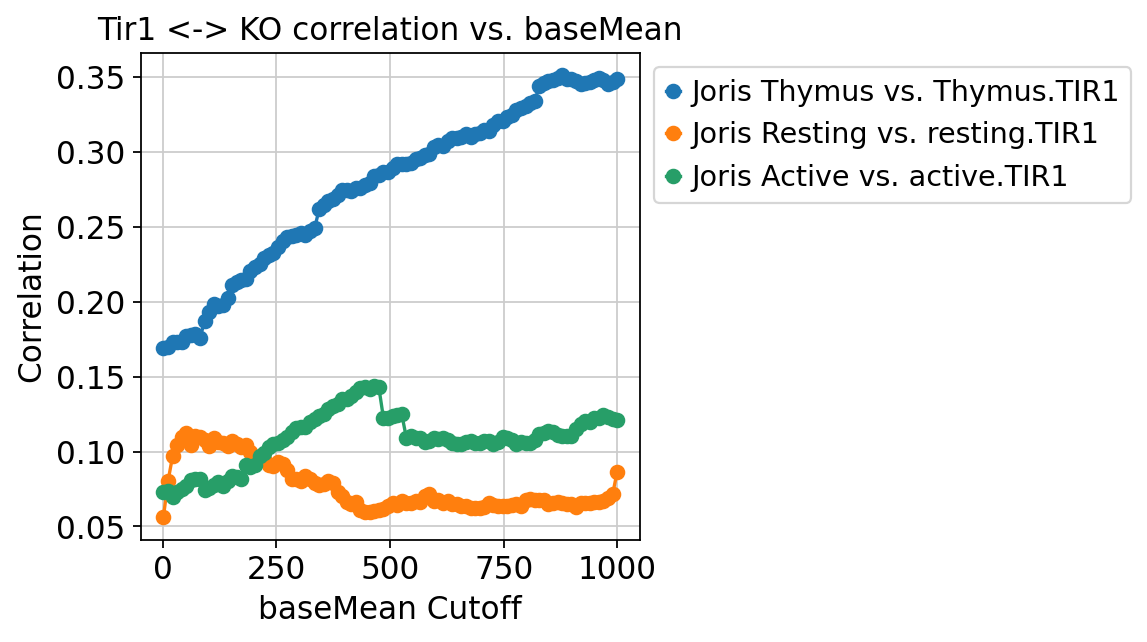

In [23]:
make_basemean_correlation_plot(lfc_df_all, joris_cols, wei_cols)

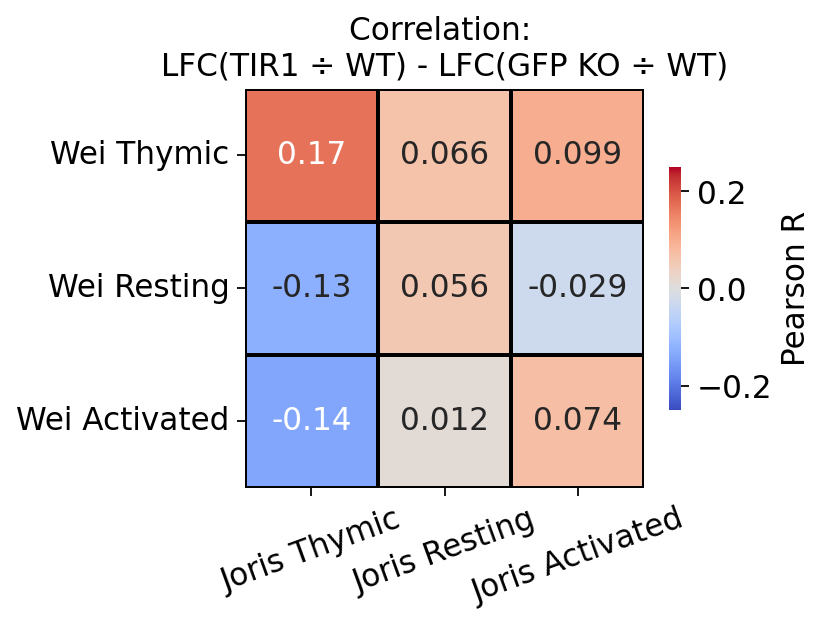

In [24]:
make_pearson_correlation_plot(basemean_co = 0);

#### FC-FC Plot

Here we want to make a FC-FC plot between Tir1 (Foxp3 degrade) and Foxp3 KO

1


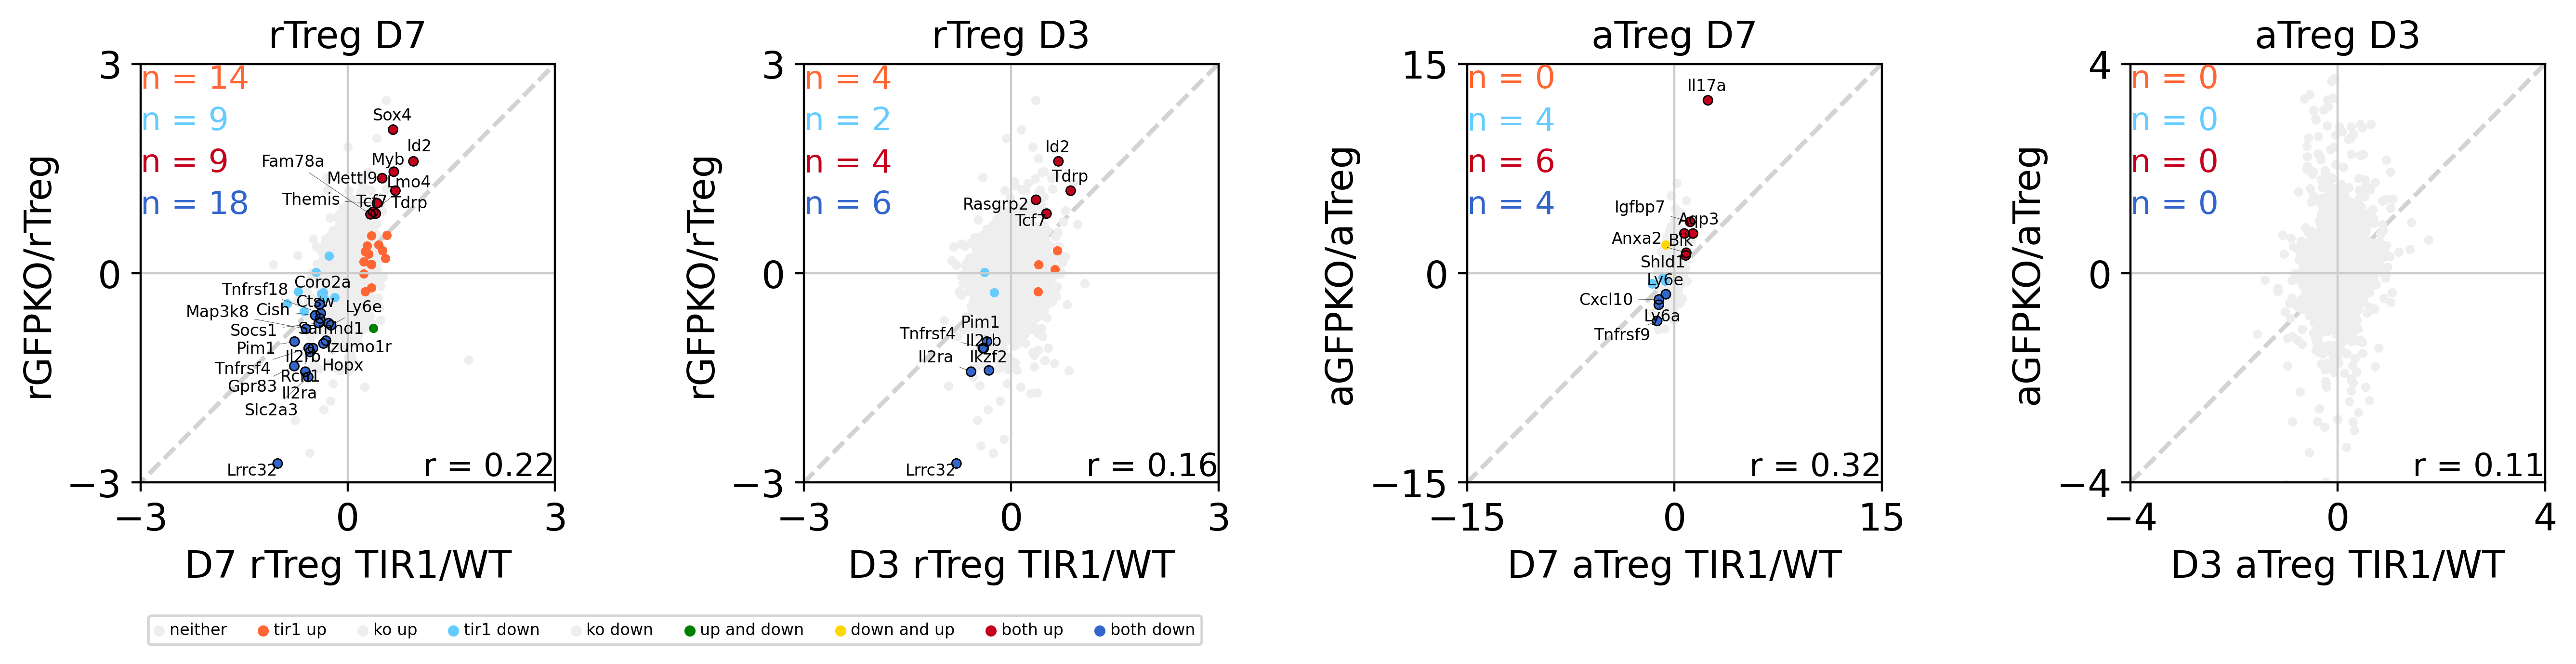

In [25]:
%autoreload 2
from plot_bulk_RNA import *

comparisons = {
    'D7 rTreg TIR1/WT_vs_rGFPKO/rTreg' : [wei_sc_cols_d7[0], joris_cols[1], ],
    'D3 rTreg TIR1/WT_vs_rGFPKO/rTreg' : [wei_sc_cols_d3[0], joris_cols[1], ],
    'D7 aTreg TIR1/WT_vs_aGFPKO/aTreg' : [wei_sc_cols_d7[1], joris_cols[2], ],
    'D3 aTreg TIR1/WT_vs_aGFPKO/aTreg' : [wei_sc_cols_d3[1], joris_cols[2], ],
}

xlimdict = {
    'D7 rTreg TIR1/WT_vs_rGFPKO/rTreg' : [-3, 3],
    'D3 rTreg TIR1/WT_vs_rGFPKO/rTreg' : [-3, 3],
    'D7 aTreg TIR1/WT_vs_aGFPKO/aTreg' : [-15, 15],
    'D3 aTreg TIR1/WT_vs_aGFPKO/aTreg' : [-4, 4],
}

ylimdict = {
    'D7 rTreg TIR1/WT_vs_rGFPKO/rTreg' : [-3, 3],
    'D3 rTreg TIR1/WT_vs_rGFPKO/rTreg' : [-3, 3],
    'D7 aTreg TIR1/WT_vs_aGFPKO/aTreg' : [-15, 15],
    'D3 aTreg TIR1/WT_vs_aGFPKO/aTreg' : [-4, 4],
}


titledict = {
    'D7 rTreg TIR1/WT_vs_rGFPKO/rTreg' : 'rTreg D7',
    'D3 rTreg TIR1/WT_vs_rGFPKO/rTreg' : 'rTreg D3',
    'D7 aTreg TIR1/WT_vs_aGFPKO/aTreg' : 'aTreg D7',
    'D3 aTreg TIR1/WT_vs_aGFPKO/aTreg' : 'aTreg D3',
}

genes_to_label_dict = {
    'D7 rTreg TIR1/WT_vs_rGFPKO/rTreg' : [],
    'D3 rTreg TIR1/WT_vs_rGFPKO/rTreg' : [],
    'D7 aTreg TIR1/WT_vs_aGFPKO/aTreg' : [],
    'D3 aTreg TIR1/WT_vs_aGFPKO/aTreg' : [],
    
    
}


f = plot_bulk_fc_fc_plot(comparisons, lfc_df_all, pval_df_all, basemean_df_all, 
                                 ylimdict = ylimdict,
                                 xlimdict = xlimdict,
                                 titledict = titledict,
                                 genes_to_label_dict = genes_to_label_dict,
                                basemean_co = 0,
                                )
f.savefig('./FINAL_FIGURES/sc_vs_bulk.pdf', bbox_inches = 'tight')

Here we show that in rTreg, there is a greater magnitude of LFC in Joris' resting data than in the Tir1 data

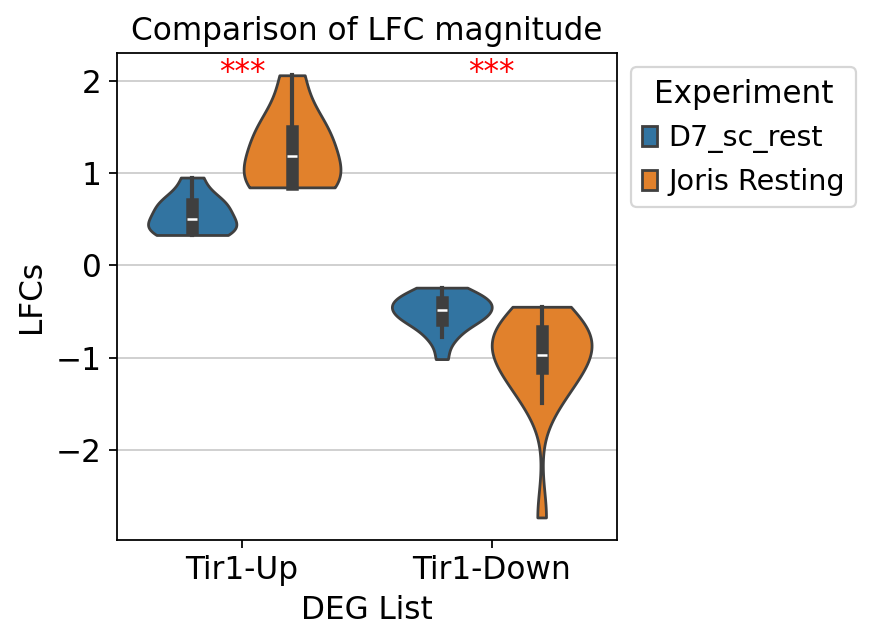

In [26]:
comps = [
[wei_sc_cols_d7[0], joris_cols[1], ],
# [wei_sc_cols_d7[1], joris_cols[2], ],
]
data = []
for col1, col2 in comps:
    idx_down = (pval_df_all[col1] < .05) & (pval_df_all[col2] < .05) & (lfc_df_all[col1] < 0) & (lfc_df_all[col2] < 0)
    idx_up = (pval_df_all[col1] < .05) & (pval_df_all[col2] < .05) & (lfc_df_all[col1] > 0) & (lfc_df_all[col2] > 0)

    vals_up = lfc_df_all.loc[idx_up, [col1, col2]]
    vals_down = lfc_df_all.loc[idx_down, [col1, col2]]
    vals_up['Direction'] = 'Tir1-Up'
    vals_down['Direction'] = 'Tir1-Down'
    data.append(vals_up)
    data.append(vals_down)
    
    data = pd.concat(data, axis=0)
    data = pd.melt(data, id_vars=['Direction'])
    data['variable'] = data['variable'].apply(col_to_name.get)
    data.columns = ['DEG List', 'Experiment', 'LFCs']
    
    plt.title("Comparison of LFC magnitude")
    sns.violinplot(data[data['Experiment'].str.contains('est')].dropna(), x='DEG List', y='LFCs', hue='Experiment', zorder=2,
                   cut=0)
    
    # Calculate ranksums for each 'DEG List' category
    categories = data['DEG List'].unique()
    for category in categories:
        group_data = data[data['DEG List'] == category]
        experiments = group_data['Experiment'].unique()
        if len(experiments) > 1:
            stat, p_value = scipy.stats.ranksums(group_data[group_data['Experiment'] == experiments[0]]['LFCs'].dropna(),
                                     group_data[group_data['Experiment'] == experiments[1]]['LFCs'].dropna()
                                                )
            # Add asterisks for significant results
            y_max = group_data['LFCs'].max()
            x_pos = list(categories).index(category)
            significance_level = format_pval_as_asterisks(p_value)
            plt.gca().text(x_pos, 2, significance_level, horizontalalignment='center', color='red', fontsize=14)
    plt.legend(bbox_to_anchor=(1, 1), title='Experiment', loc='upper left')
    plt.show()


#### Foxp3 peaks at DEGs

Here we are plotting the number of Foxp3 peaks near DEGs

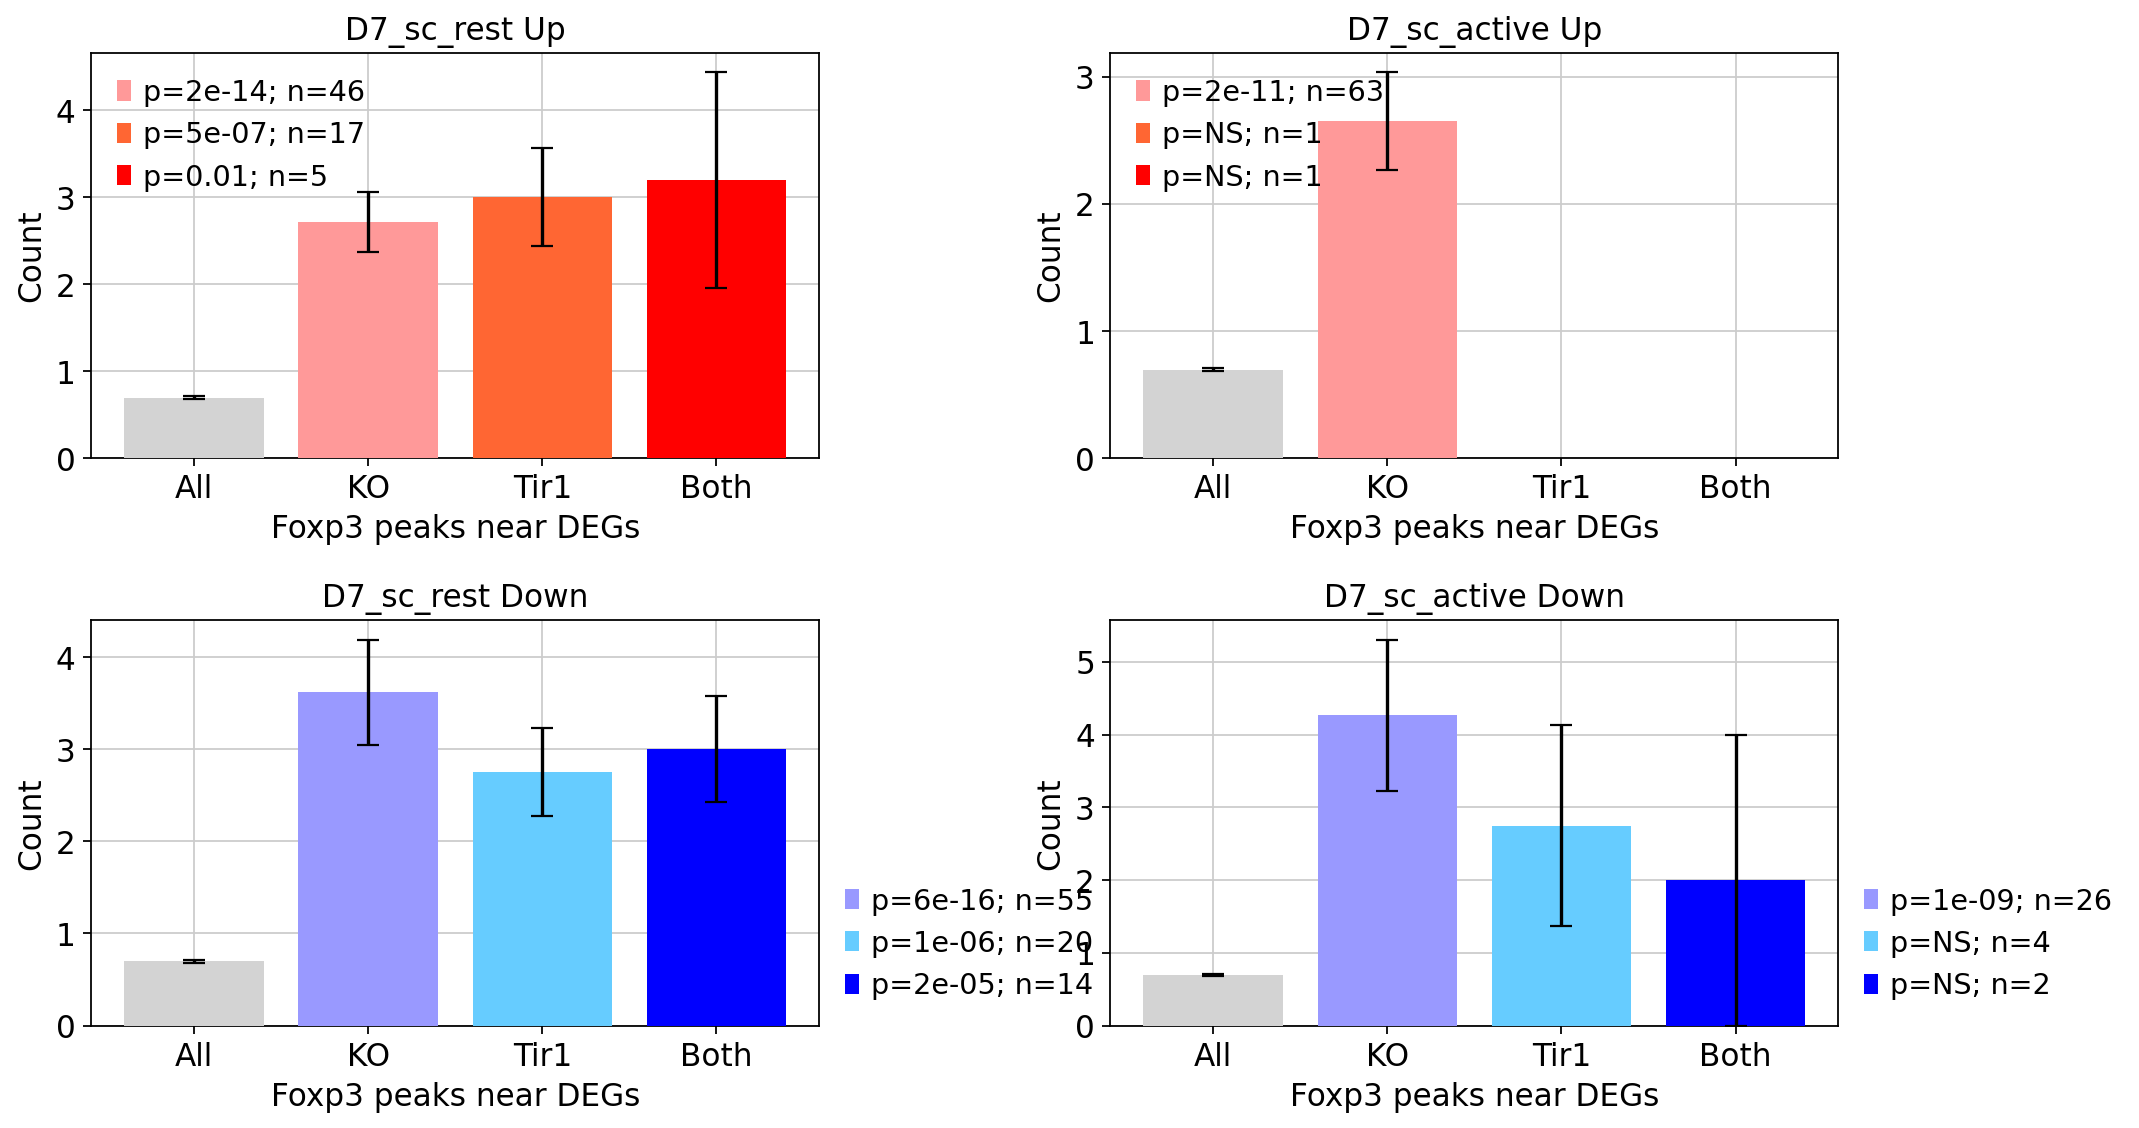

In [27]:
%autoreload 2
from foxp3_pileup_plots_for_wei import *

cols = [[wei_sc_cols_d7[0], wei_sc_cols_d7[1]], [joris_cols[1], joris_cols[2]]]
dict_of_vals = n_foxp3_peaks_near_degs(cols,  pval_df_all, lfc_df_all, basemean_df_all, col_to_name, foxp3_count_set, 
                        foxp3_counts, xlabel = "Foxp3 peaks near DEGs", ylabel='Count', pco = .05, basemean_co = 200,
                       )

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/scrna/lib/python3.10/site-packages/scipy/stats/_stats_py.py:9205: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/scrna/lib/python3.10/site-packages/scipy/stats/_stats_py.py:9205: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


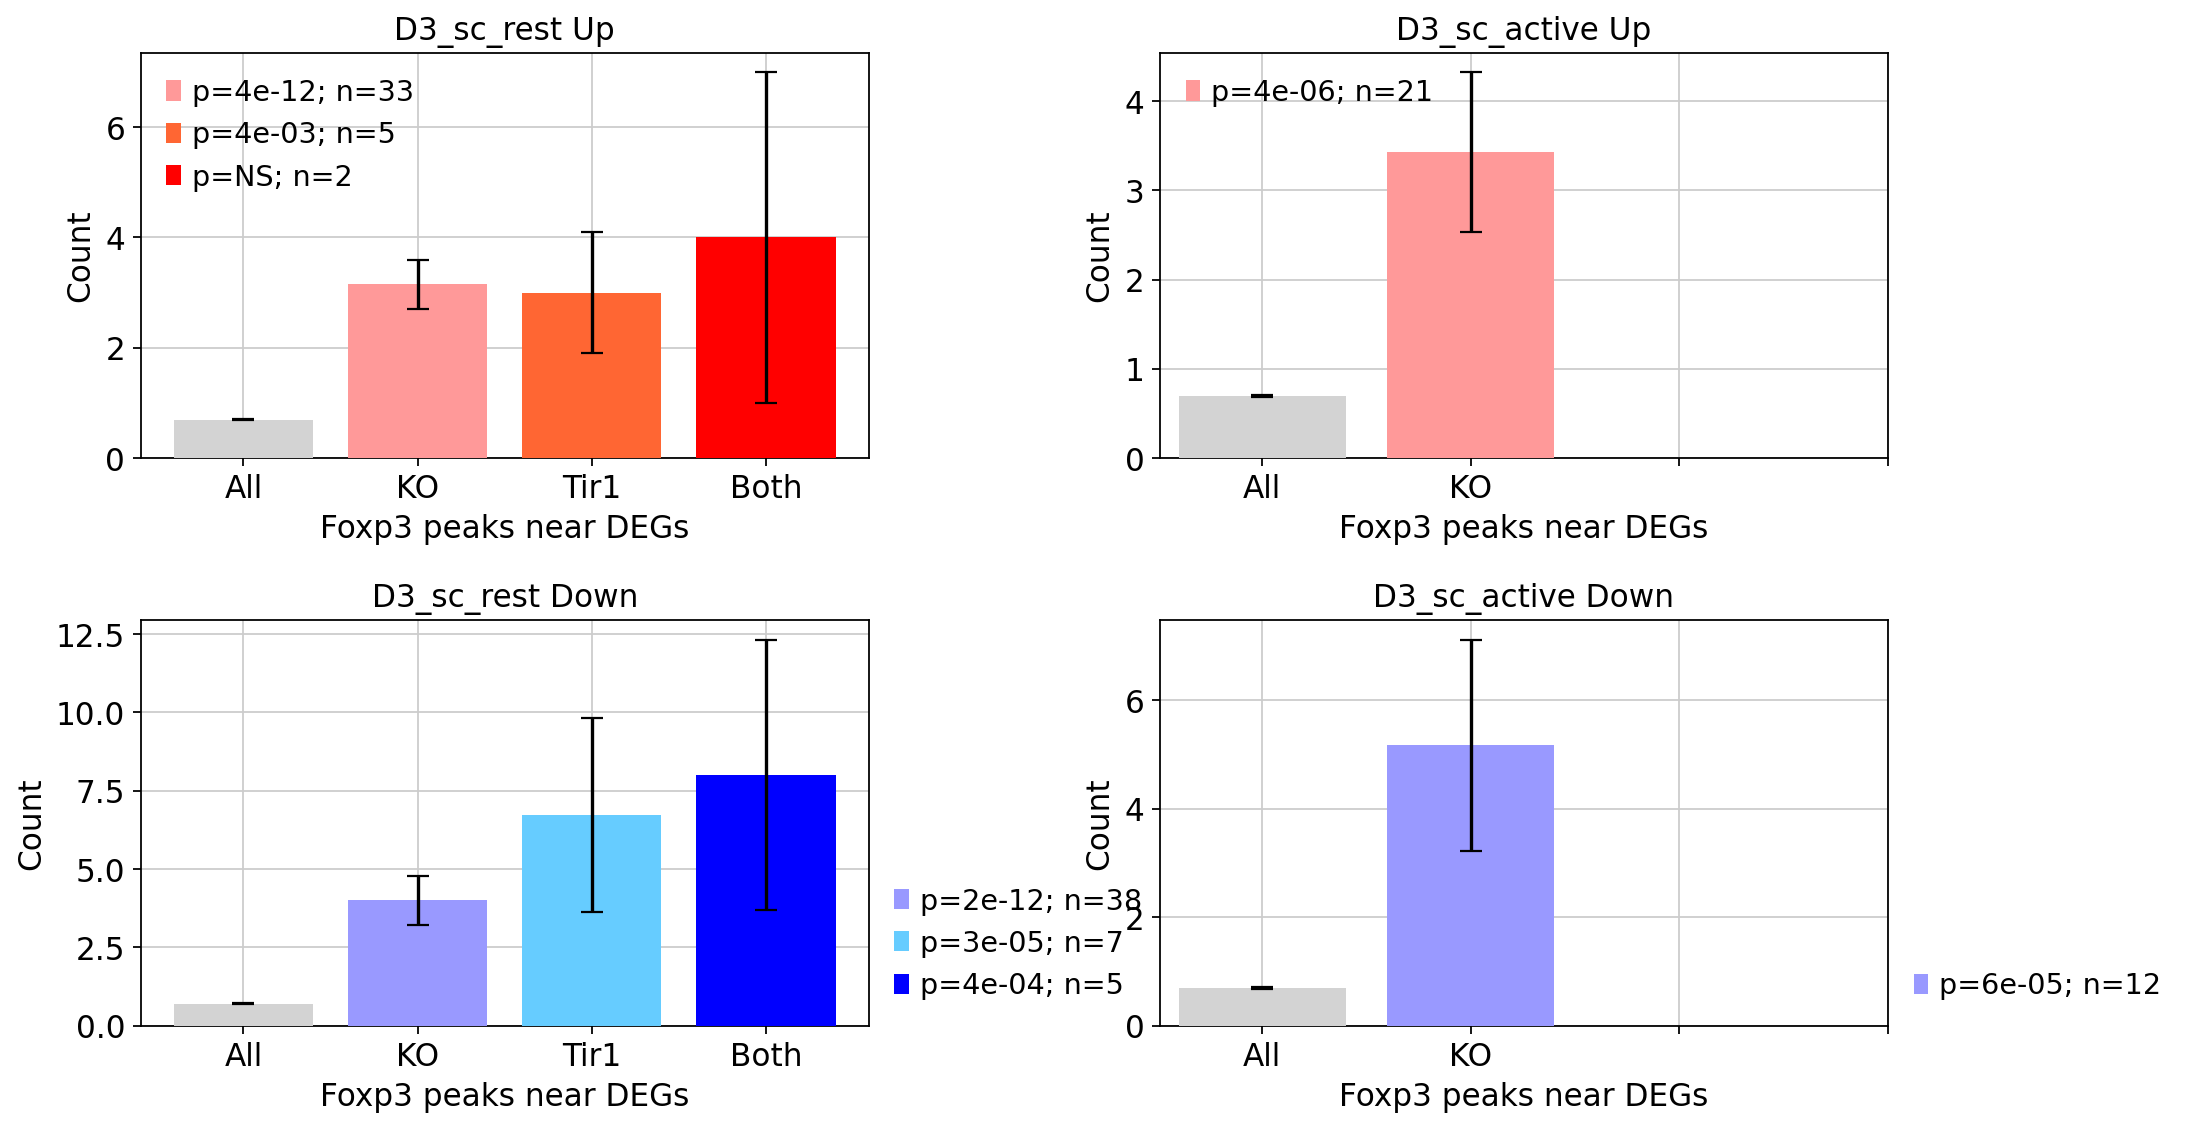

In [28]:
%autoreload 2
from foxp3_pileup_plots_for_wei import *

cols = [[wei_sc_cols_d3[0], wei_sc_cols_d3[1]], [joris_cols[1], joris_cols[2]]]
dict_of_vals = n_foxp3_peaks_near_degs(cols,  pval_df_all, lfc_df_all, basemean_df_all, col_to_name, foxp3_count_set, 
                        foxp3_counts, xlabel = "Foxp3 peaks near DEGs", ylabel='Count', pco = .05, basemean_co = 200,
                       )

### D3 / D7 dot plot

Here we are making a dot plot of the scRNA-seq data

2
2
2


<Figure size 320x320 with 0 Axes>

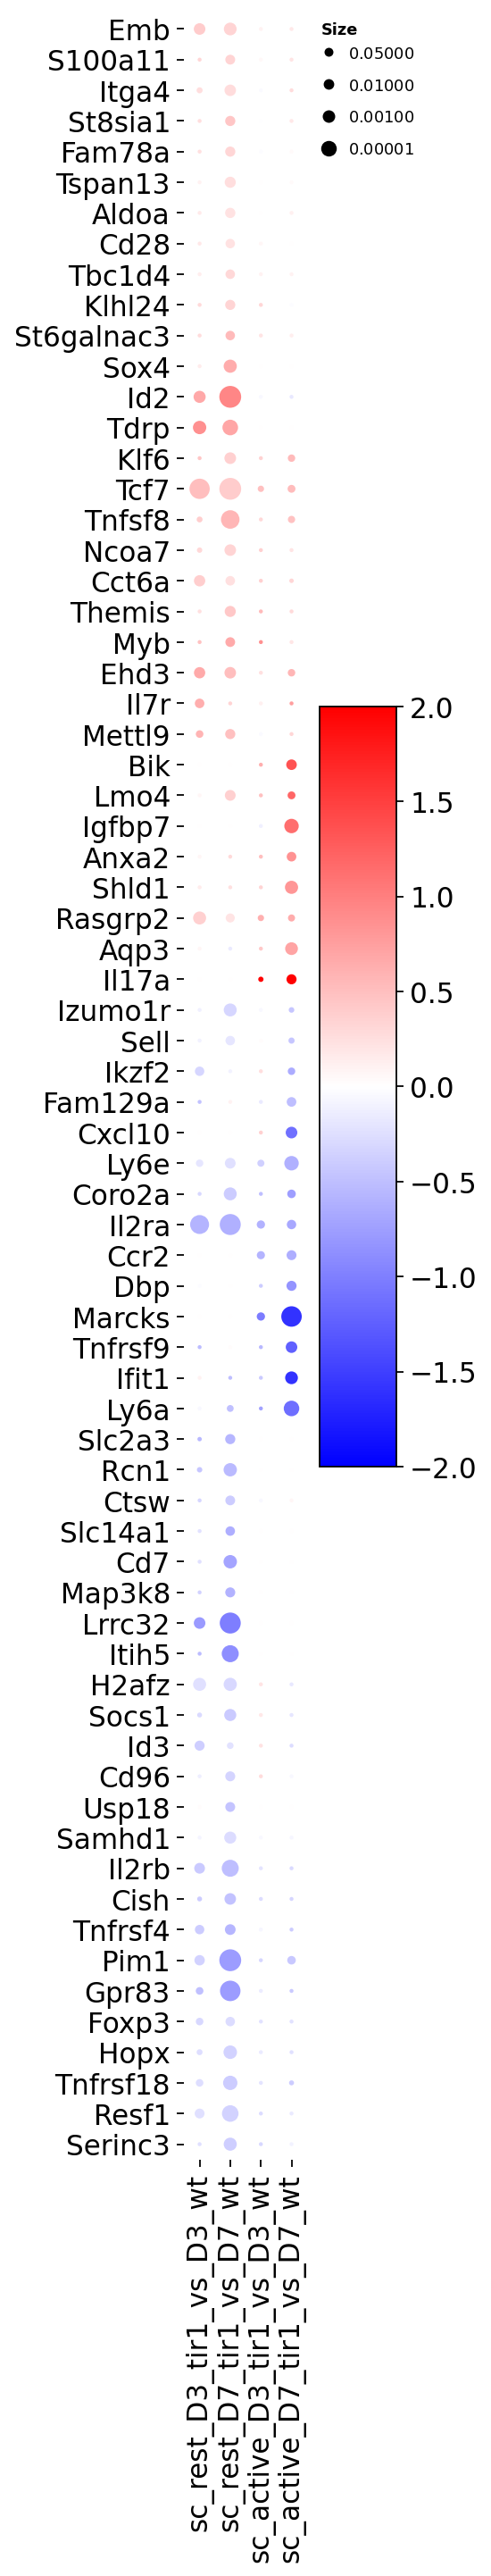

<Figure size 320x320 with 0 Axes>

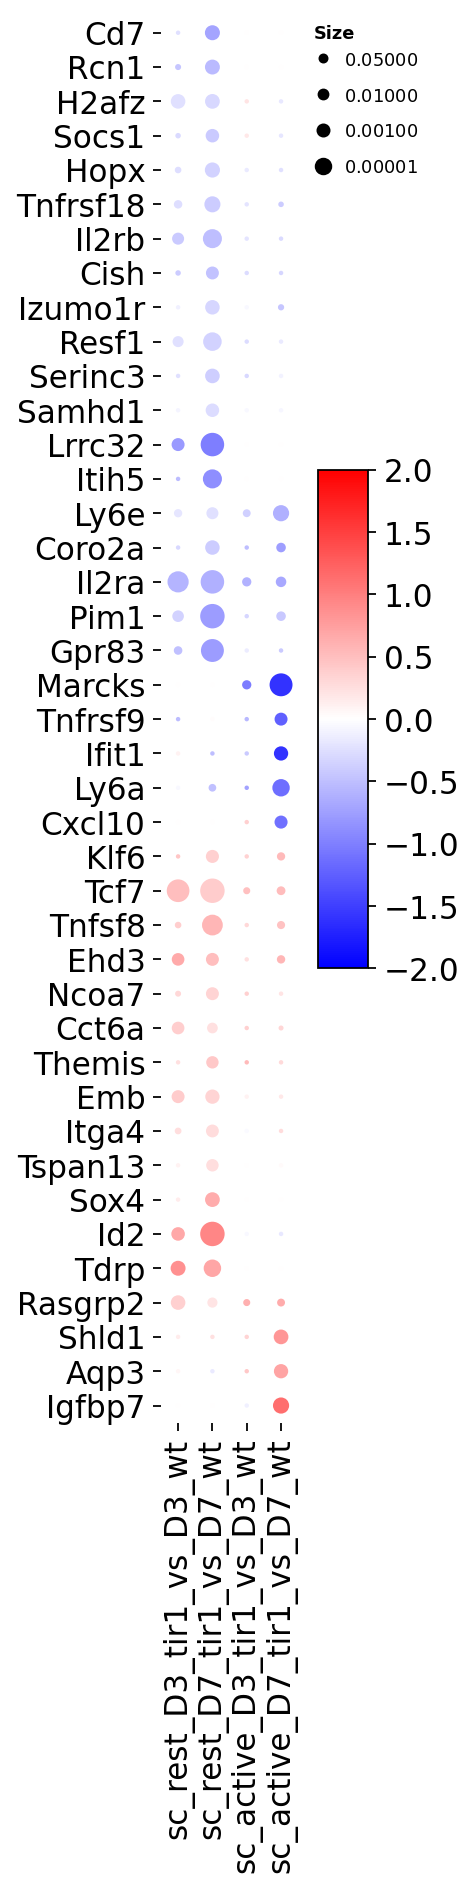

<Figure size 320x320 with 0 Axes>

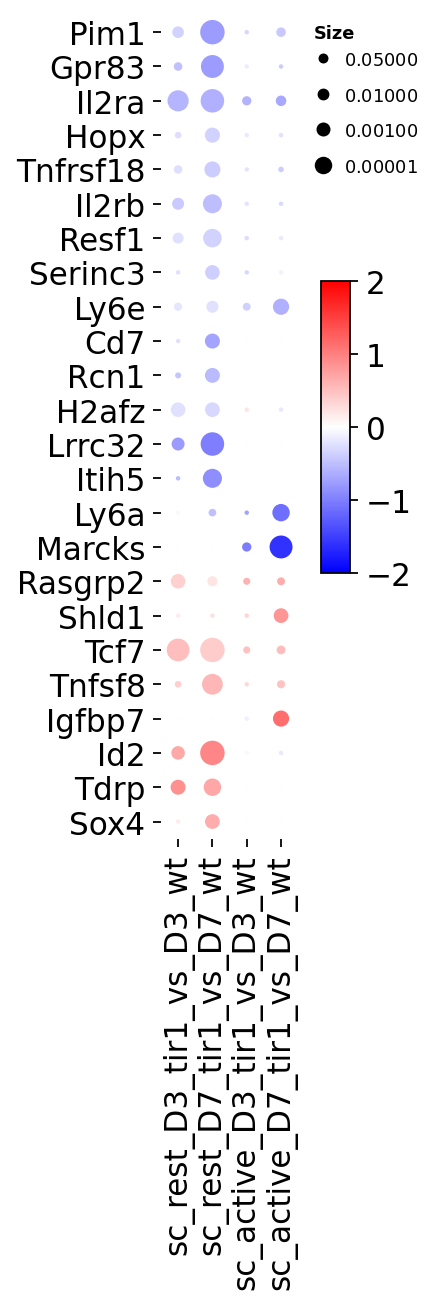

In [29]:
%autoreload 2
import milkviz as mv
for pco in [.05, .01, .001]:
    sig_idx = (pval_df_all[wei_sc_cols_d3 + wei_sc_cols_d7] < pco).any(axis=1)
    
    colsoi = [wei_sc_cols_d3[0]] + [wei_sc_cols_d7[0]] + [wei_sc_cols_d3[1]] + [wei_sc_cols_d7[1]]
    
    stat_data = lfc_df_all.loc[sig_idx, colsoi].fillna(0)
    pval_data = pval_df_all.loc[sig_idx, colsoi].fillna(1)
    motifo, _, _ = make_order_and_cluster_custom(stat_data, method='ward', metric='euclidean')
    motifo = motifo[::-1]
    pval_data, stat_data = pval_data.iloc[motifo], stat_data.iloc[motifo]
    plt.figure()
    f = mv.dot_heatmap(-np.log10(pval_data.clip(1e-10)), stat_data, yticklabels=stat_data.index,
                       xticklabels=stat_data.columns,
    #                    size_norm = colors.LogNorm(),
                       dot_size_legend_kw={"title": "Size"}, dot_cmap='bwr',
                       dot_norm = matplotlib.colors.Normalize(vmin=-2, vmax=2),
                       sizes = (1, 100),
    )
    plt.grid(False)
    plt.gcf().savefig(f'./FINAL_FIGURES/SINGLE_CELL_DOTS_pco={pco}.pdf', bbox_inches = 'tight')

#### Single-cell FC-FC plots

Here we want to compare scRNA-seq FCs to the Foxp3 KO FCs (which we have from the Joris 2020 dataset), without labelling and with CDFs below (different formatting from before)

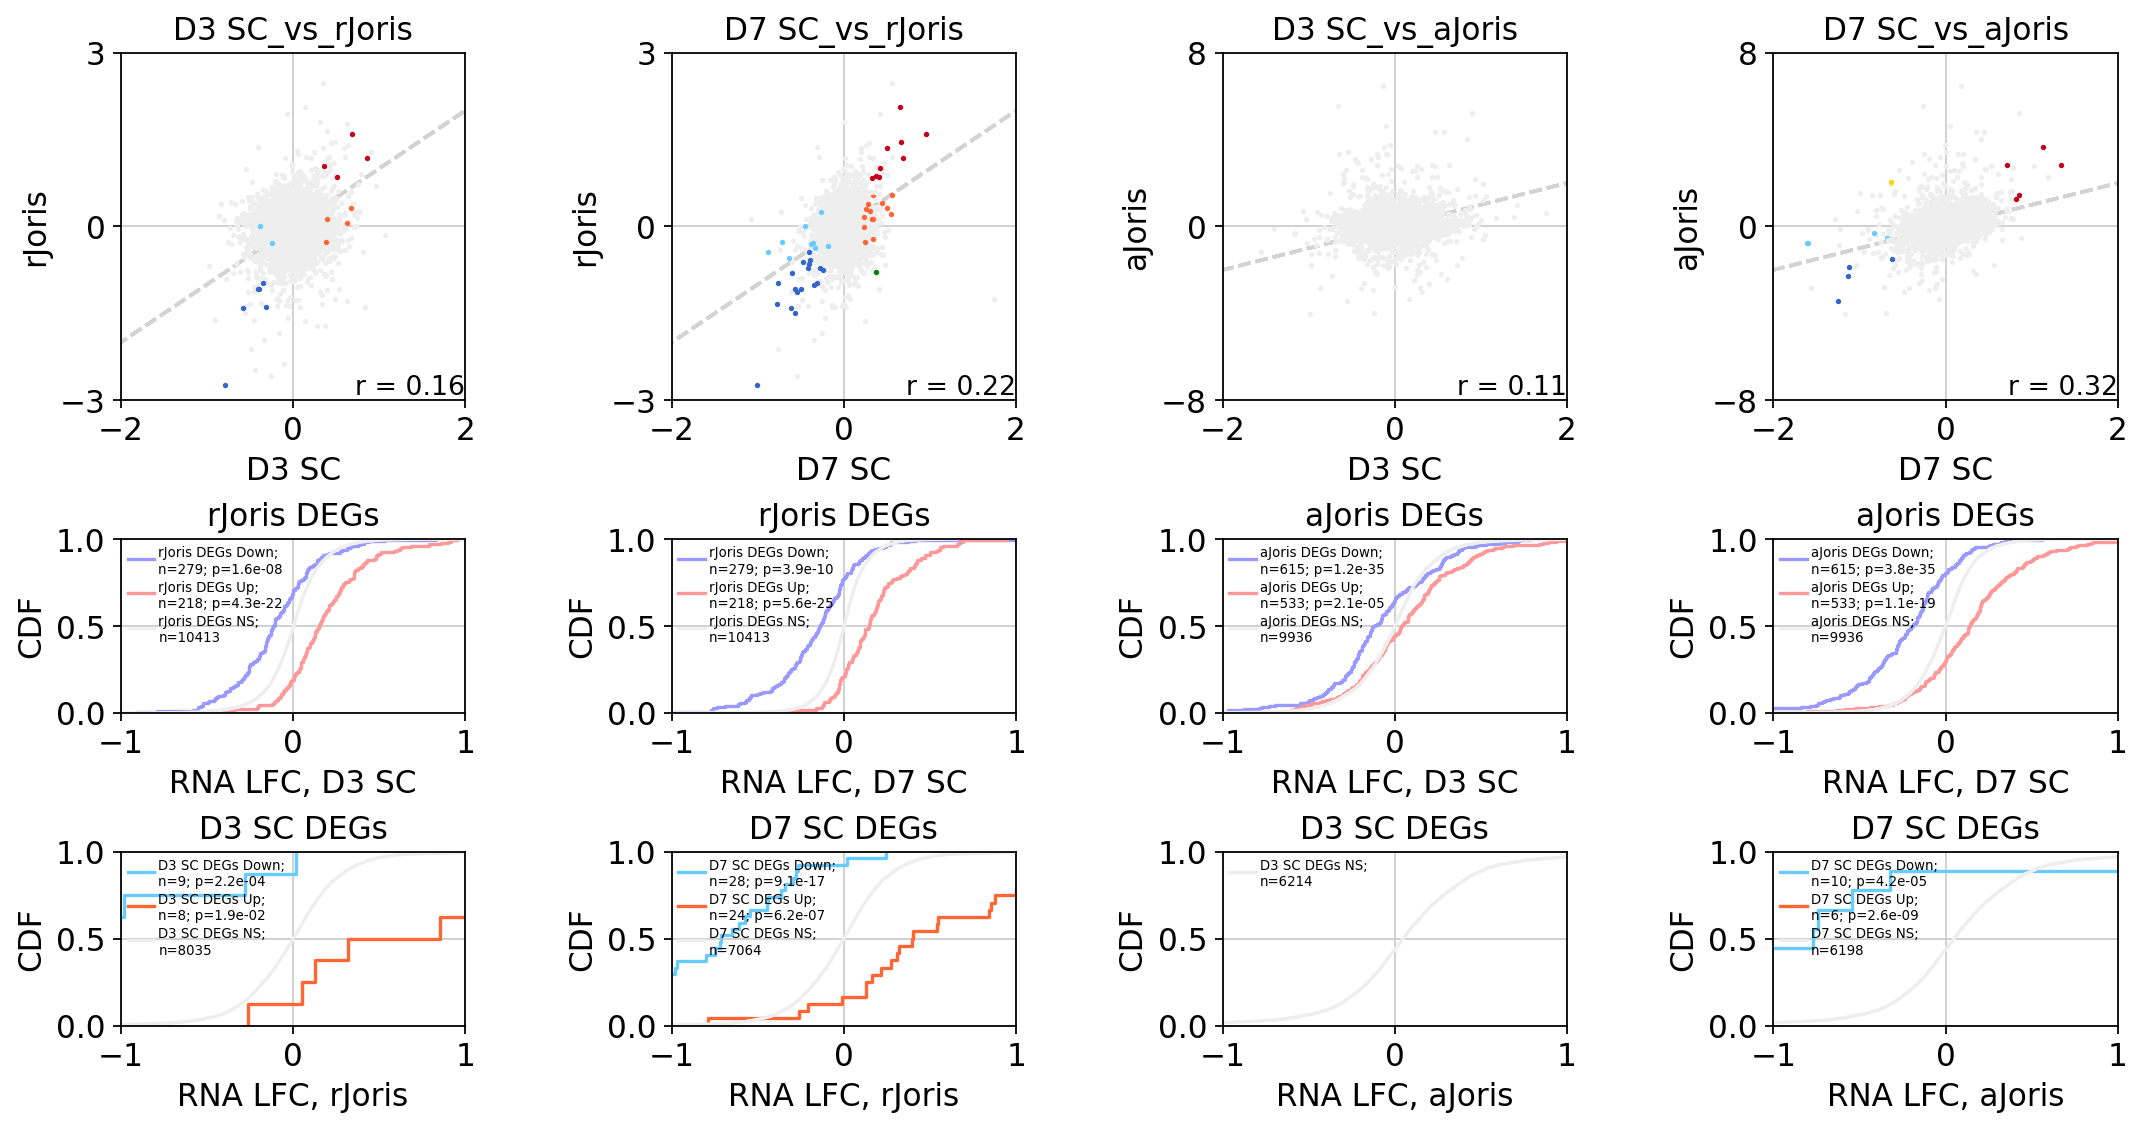

In [30]:
%autoreload 2
from plot_bulk_RNA import *

comparisons = {
    'D3 SC_vs_rJoris' : [wei_sc_cols_d3[0], joris_cols[1]],
    'D7 SC_vs_rJoris' : [wei_sc_cols_d7[0], joris_cols[1]],
    'D3 SC_vs_aJoris' : [wei_sc_cols_d3[1], joris_cols[2]],
    'D7 SC_vs_aJoris' : [wei_sc_cols_d7[1], joris_cols[2]],

}

ylimdict = {
    'D3 SC_vs_rJoris' : [-3, 3],
    'D7 SC_vs_rJoris' : [-3, 3],
    'D3 SC_vs_aJoris' : [-8, 8],
    'D7 SC_vs_aJoris' : [-8, 8],
}

f = plot_bulk_fc_fc_and_cdf_plot(comparisons, lfc_df_all, pval_df_all, basemean_df_all, ylimdict = ylimdict,
                                )
f.savefig('./FINAL_FIGURES/degradation_vs_ko_figure2d.pdf', bbox_inches = 'tight')

Here we are comparing D3 vs D7 single-cell

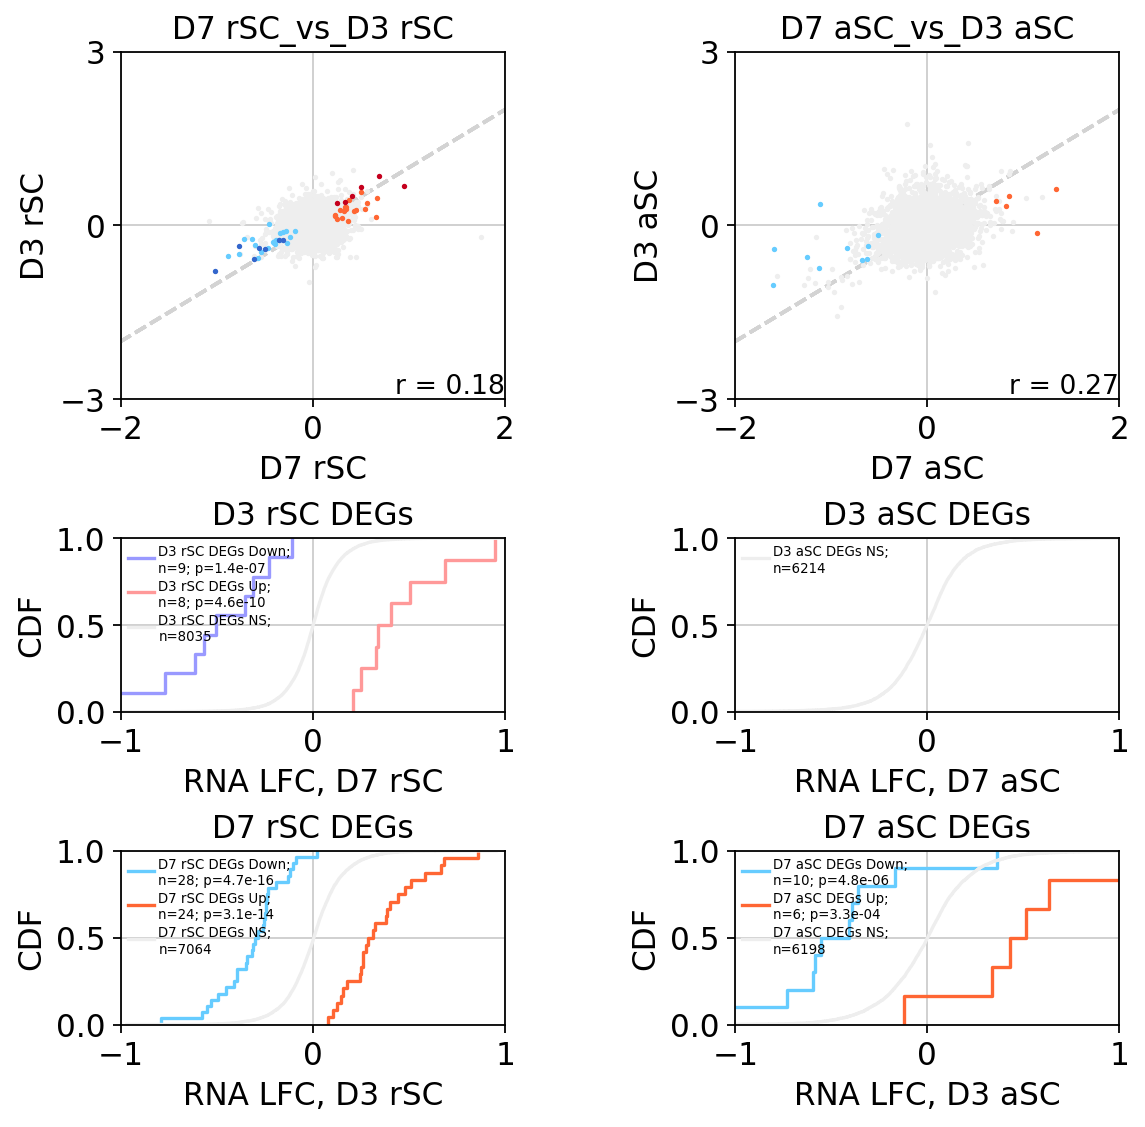

In [31]:
%autoreload 2
from plot_bulk_RNA import *

comparisons = {
    'D7 rSC_vs_D3 rSC' : [wei_sc_cols_d7[0], wei_sc_cols_d3[0]],
    'D7 aSC_vs_D3 aSC' : [wei_sc_cols_d7[1], wei_sc_cols_d3[1]],
}

ylimdict = {
    'D7 rSC_vs_D3 rSC' : [-3, 3],
    'D7 aSC_vs_D3 aSC' : [-3, 3],
}

f = plot_bulk_fc_fc_and_cdf_plot(comparisons, lfc_df_all, pval_df_all, basemean_df_all, ylimdict = ylimdict)
f.savefig('./FINAL_FIGURES/sc_d3_vs_sc_d7.pdf', bbox_inches = 'tight')

### FC-FC Plots

Here we are comparing bulk (as opposed to pseudobulk single cell) Tir1 RNA-seq to bulk Foxp3 KO

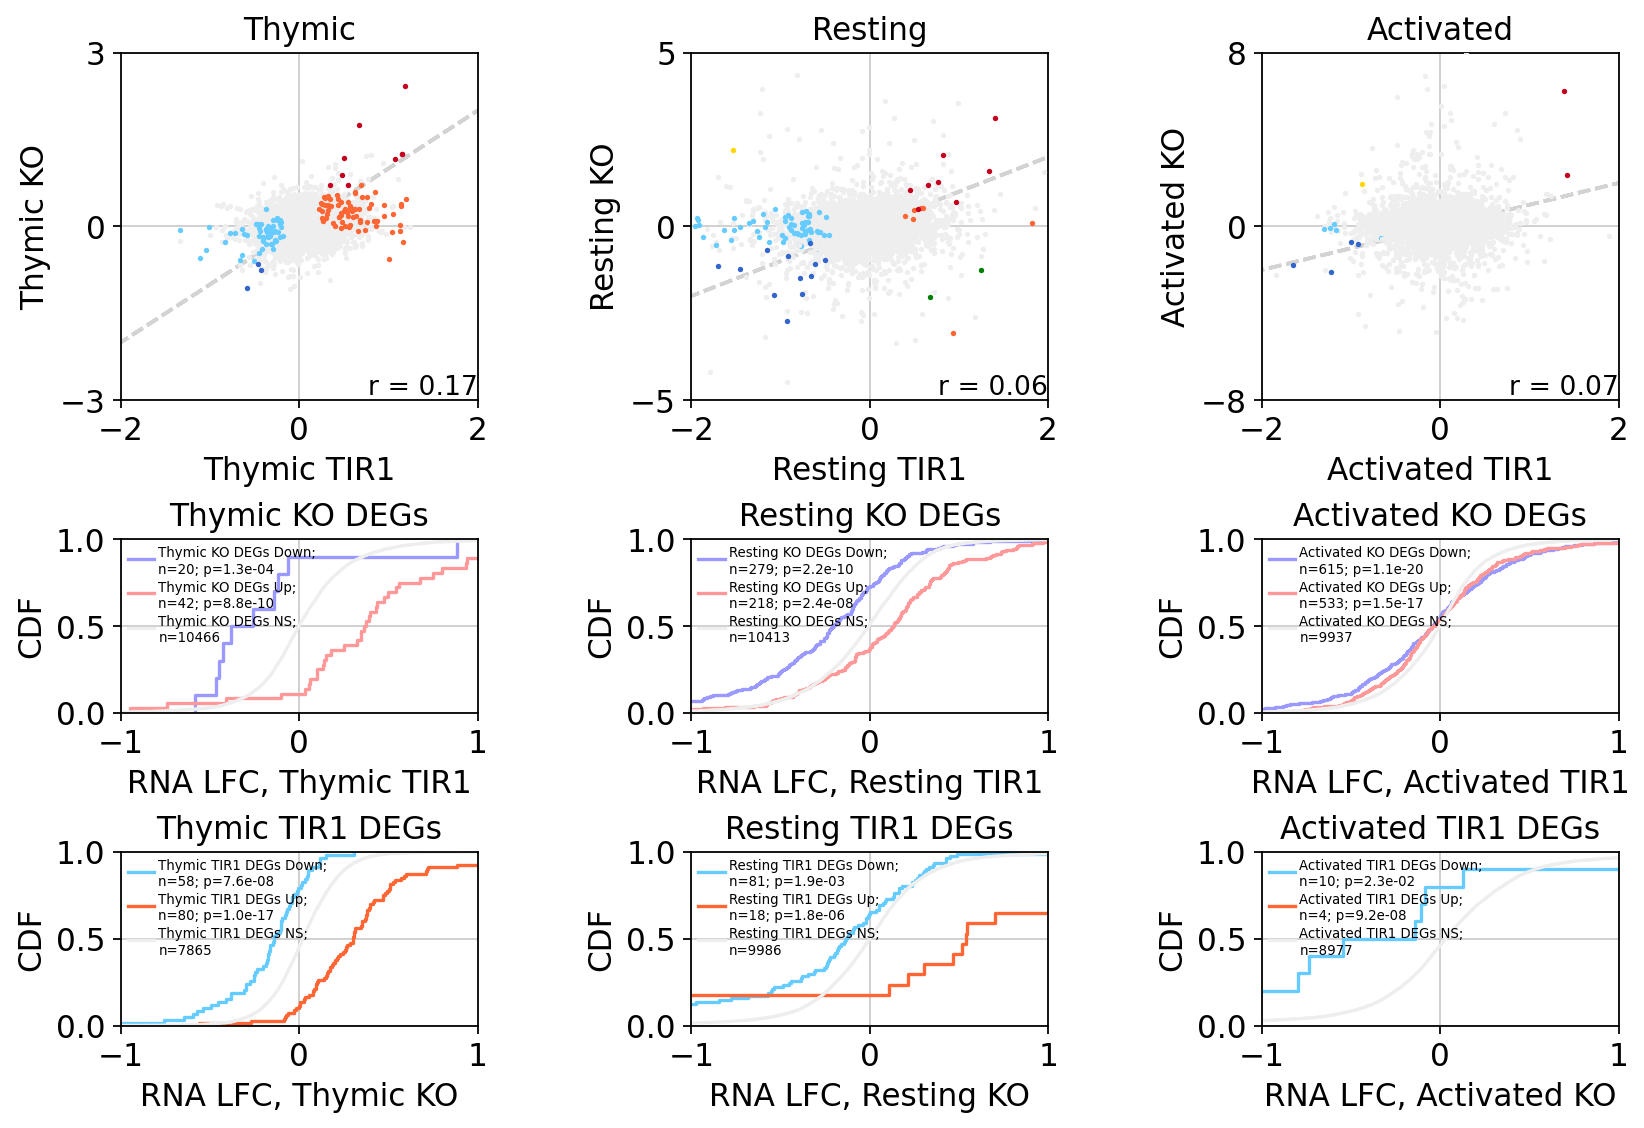

In [32]:
%autoreload 2
from plot_bulk_RNA import *

comparisons = {
    'Thymic TIR1_vs_Thymic KO' : ['wei_Thymus.TIR1.Developing_vs_Thymus.WT.Developing', 'joris_CD73__Thymic_Foxp3_GFPKO_vs_CD73__Thymic_Treg',],
    'Resting TIR1_vs_Resting KO' : ['wei_SpleenLN.TIR1.Resting_vs_SpleenLN.WT.Resting', 'joris_resting_Foxp3_GFPKO_vs_resting_Treg_GFP_DTR_WT',],
    'Activated TIR1_vs_Activated KO' : ['wei_SpleenLN.TIR1.Activated_vs_SpleenLN.WT.Activated', 'joris_activated_Foxp3_GFPKO_vs_activated_Treg_GFP_DTR_WT',],
}

ylimdict = {
    'Thymic TIR1_vs_Thymic KO' : [-3, 3],
    'Resting TIR1_vs_Resting KO' : [-5, 5],
    'Activated TIR1_vs_Activated KO' : [-8, 8],
}

titledict = {
    'Thymic TIR1_vs_Thymic KO' : 'Thymic',
    'Resting TIR1_vs_Resting KO' : 'Resting',
    'Activated TIR1_vs_Activated KO' : 'Activated',
    
}

f = plot_bulk_fc_fc_and_cdf_plot(comparisons, lfc_df_all, pval_df_all, basemean_df_all, ylimdict = ylimdict, titledict=titledict, 
                                )
f.savefig('./FINAL_FIGURES/degradation_vs_ko_figure2d.pdf', bbox_inches = 'tight')

#### Wald data, experiment

Here, we are going to examine the most differential genes to see if there is a pattern in Foxp3 binding

In [33]:
all_clustering_cols = {
    'sc rD3' : wei_sc_cols_d3[0],
    'sc rD7' : wei_sc_cols_d7[0],
    'sc aD3' : wei_sc_cols_d3[1],
    'sc aD7' : wei_sc_cols_d7[1],

    'Joris r' : joris_cols[0],
    'Joris a' : joris_cols[1],
}

Here we get the most differential genes

In [34]:
# Select genes by their wald statistic quantile
qs = [0, .005, .01, .1, .5, .9, .99, .995, 1]


wald_clusters = pd.DataFrame()
wald_color_dict = {}
wald_load_dict = {}

for wald_key, lfc_key in all_clustering_cols.items():
    new_labels = pd.DataFrame(index=lfc_df_all.index)
    new_labels[wald_key] = 100
    cos = np.nanquantile(wald_df_all[lfc_key], qs)
    cos[-1] += .1
    pval = wald_df_all[lfc_key]
    for c, i in enumerate(cos[:-1]):
        genes = (pval >= i) & (pval < cos[c+1])
        new_labels.loc[genes, wald_key] = c
    
    new_labels[new_labels==100] = np.nan
    wald_clusters[wald_key] = new_labels
    wald_clusters = wald_clusters.fillna(3)

    lfcs = pd.concat([lfc_df_all[lfc_key], new_labels[wald_key]], axis=1).groupby(wald_key).mean(lfc_key)
    lfcs.index = lfcs.index.astype(int)
    wald_color_dict.update({wald_key : dict(zip(lfcs.index, sns.color_palette('coolwarm', as_cmap=True)((lfcs[lfc_key] + 1)/2)))})
    wald_load_dict.update({wald_key : lfcs[lfc_key]})

Plot the level of Foxp3 binding

(0.0, 6.0)

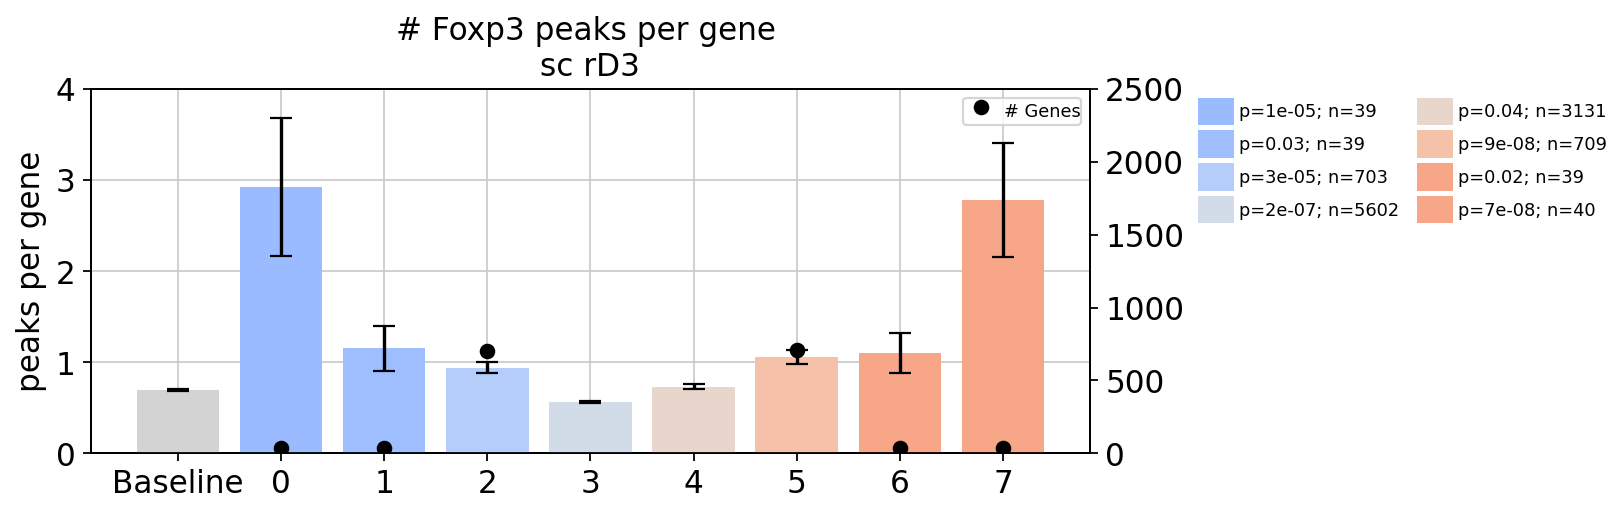

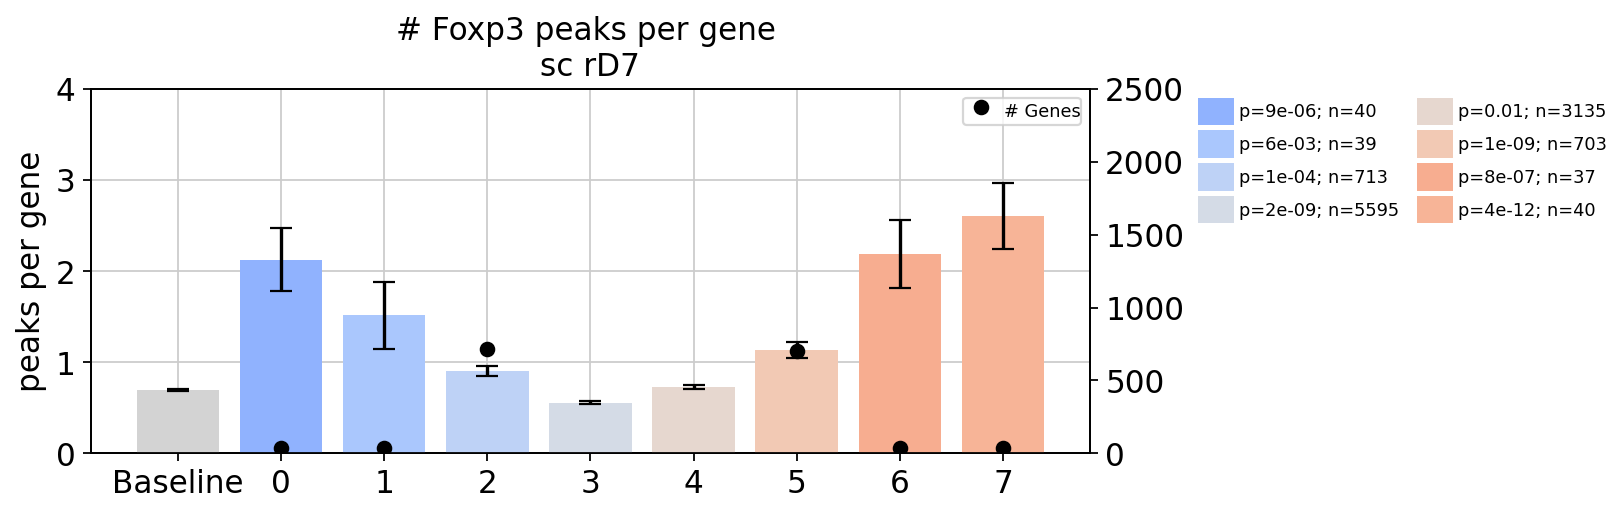

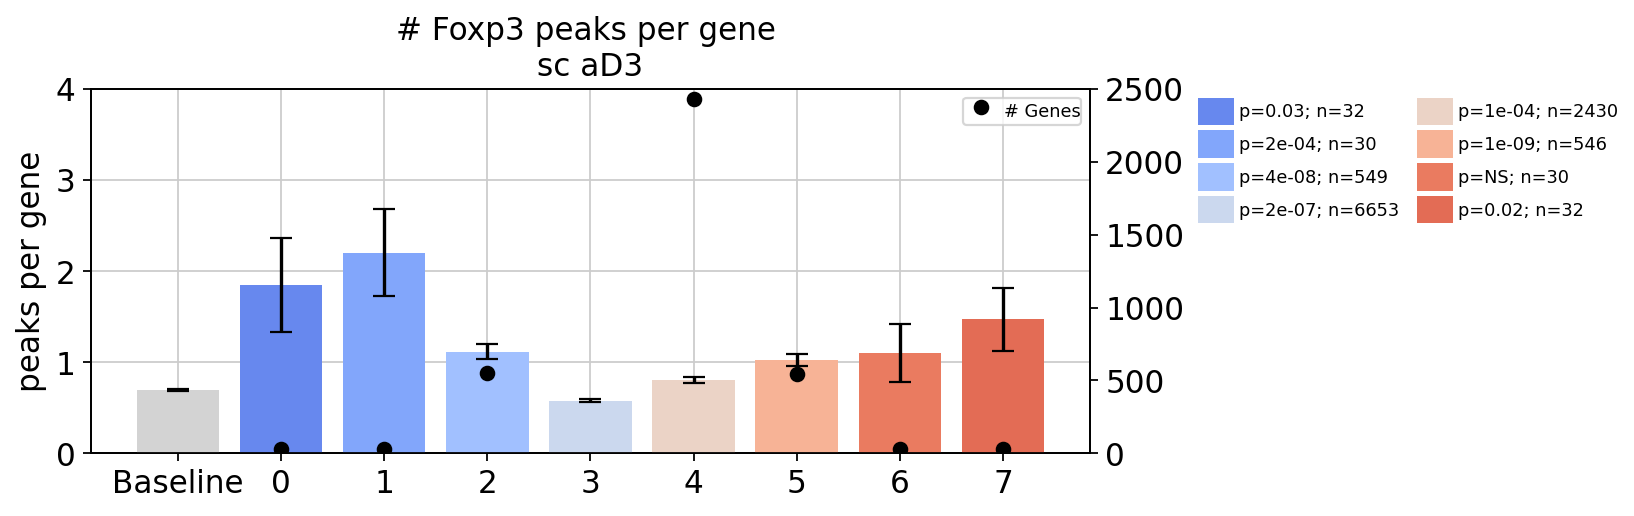

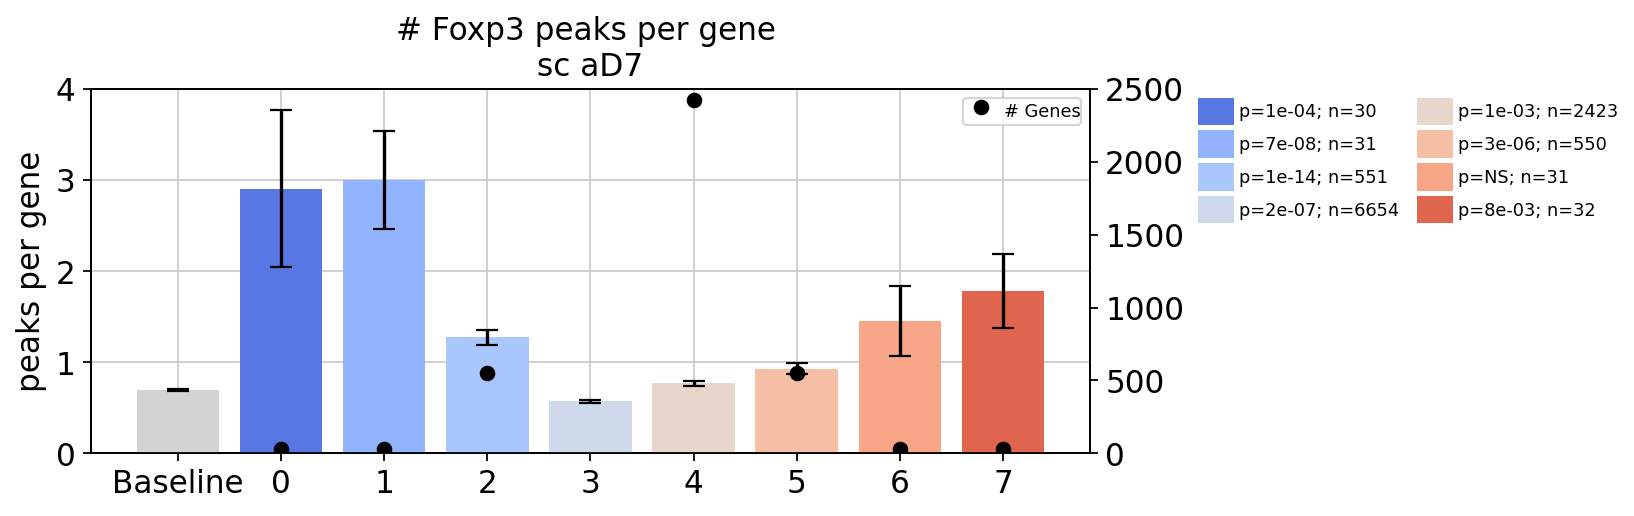

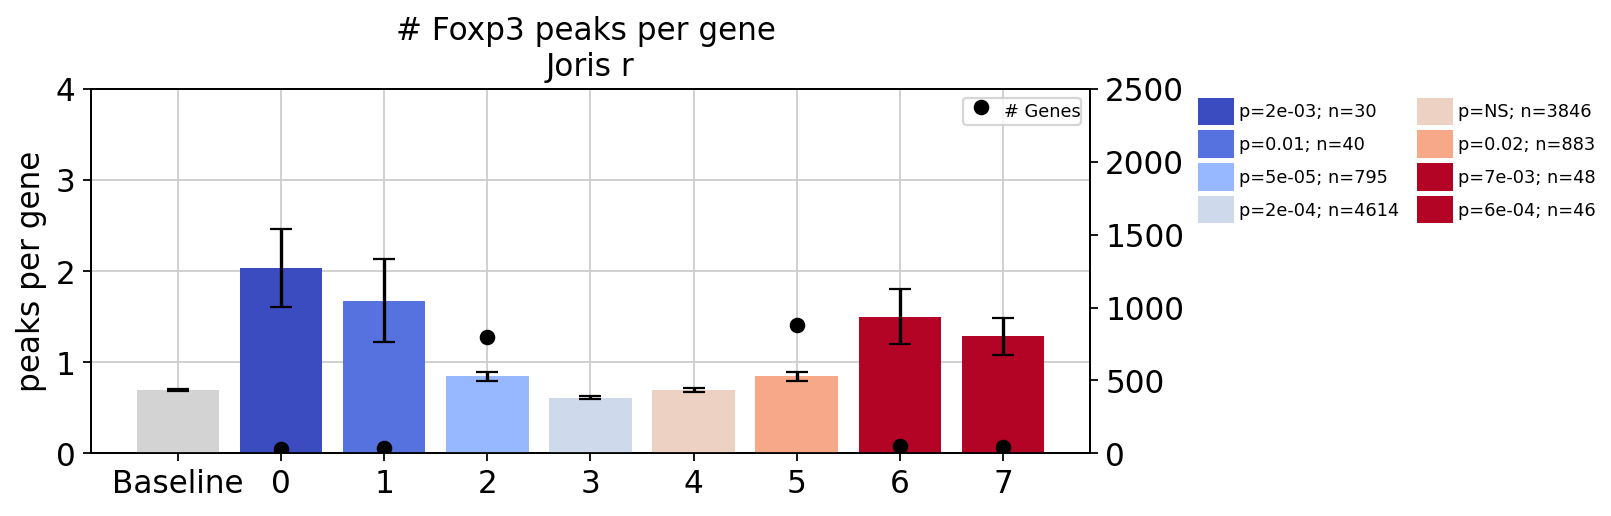

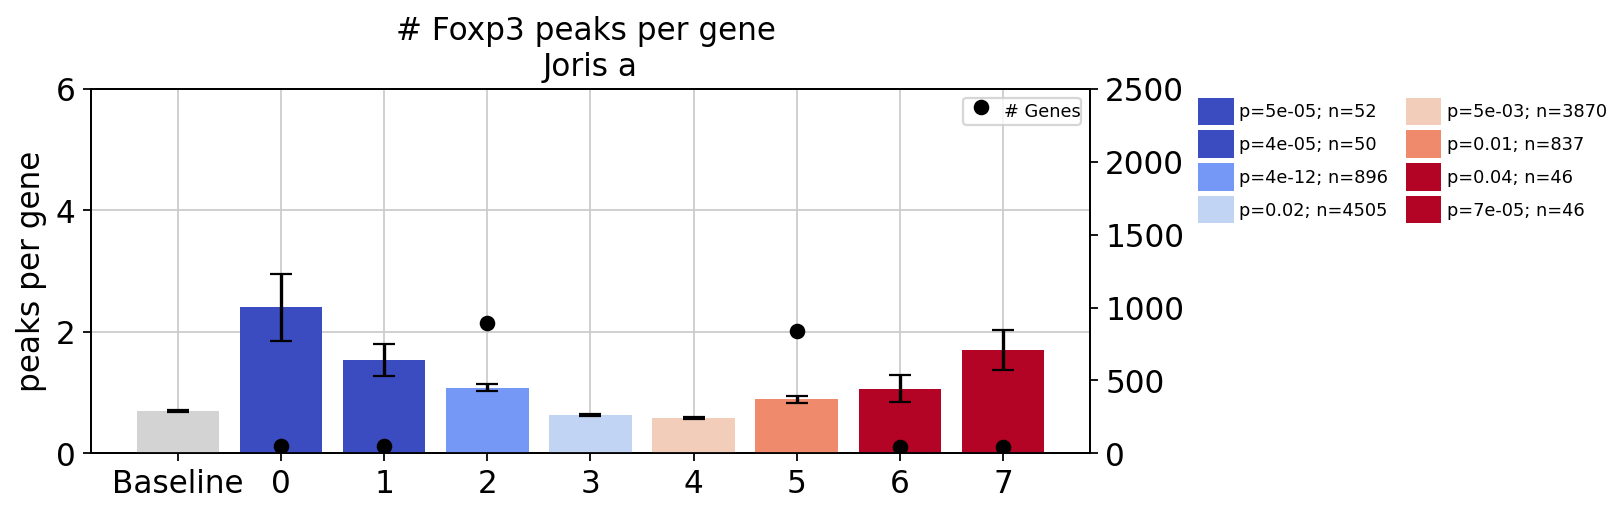

In [35]:
from make_gene_modules import *
from foxp3_pileup_plots_for_wei import plot_foxp3_peaks_near_degs_as_bar

plot_gene_module_barplots(wald_clusters, col_to_name, foxp3_count_set, 
                          foxp3_counts, wald_color_dict,
                          ymax=4, prefix='foxp3_alone',
                          title = '# Foxp3 peaks per gene')
plt.gcf().axes[0].set_ylim([0, 6])

Plot the level of Foxp3 binding (normalized by ATAC)

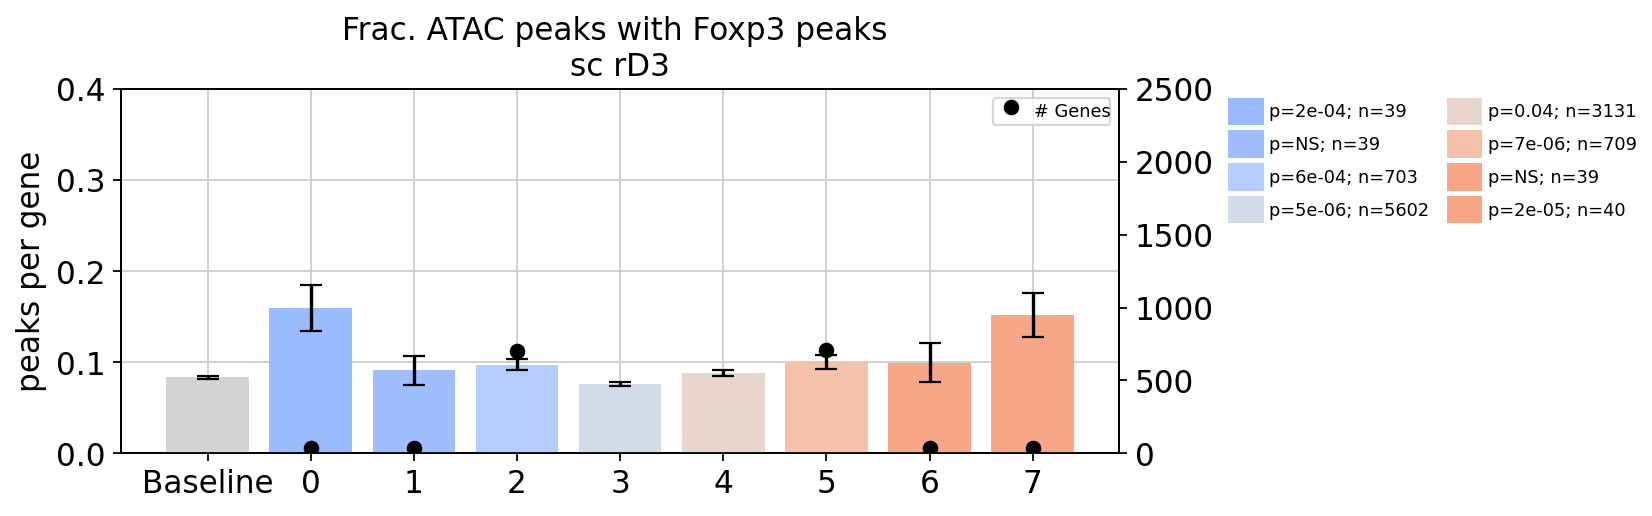

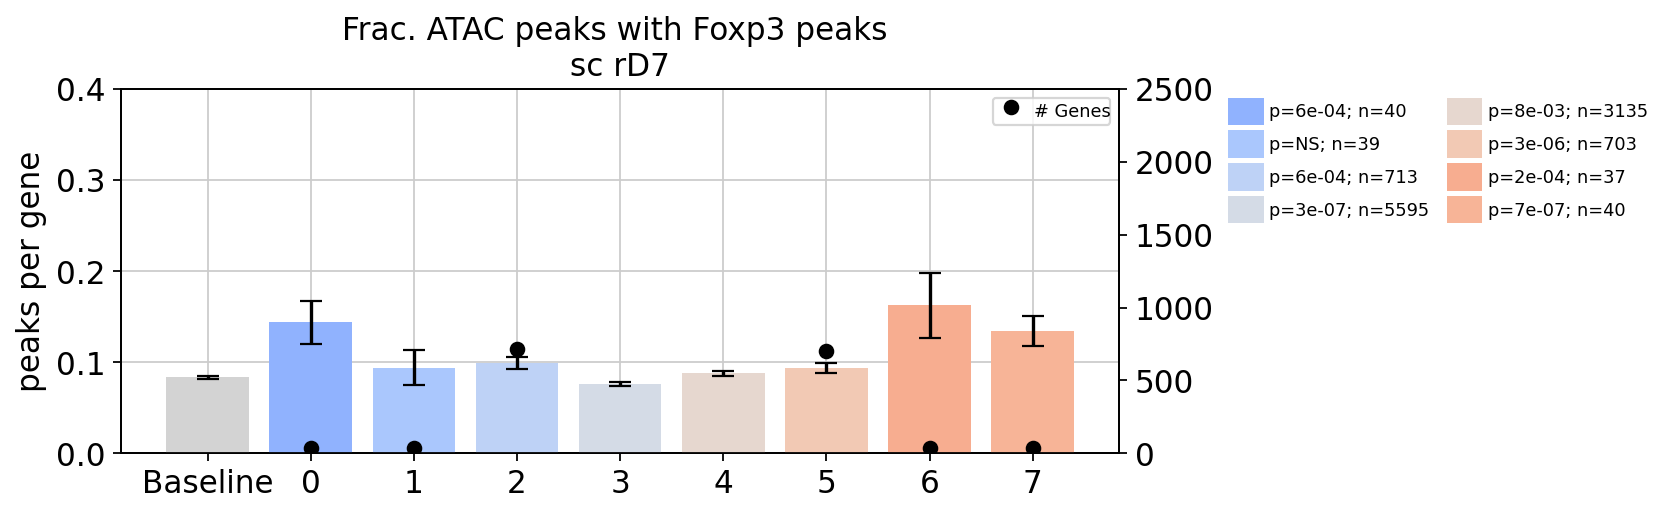

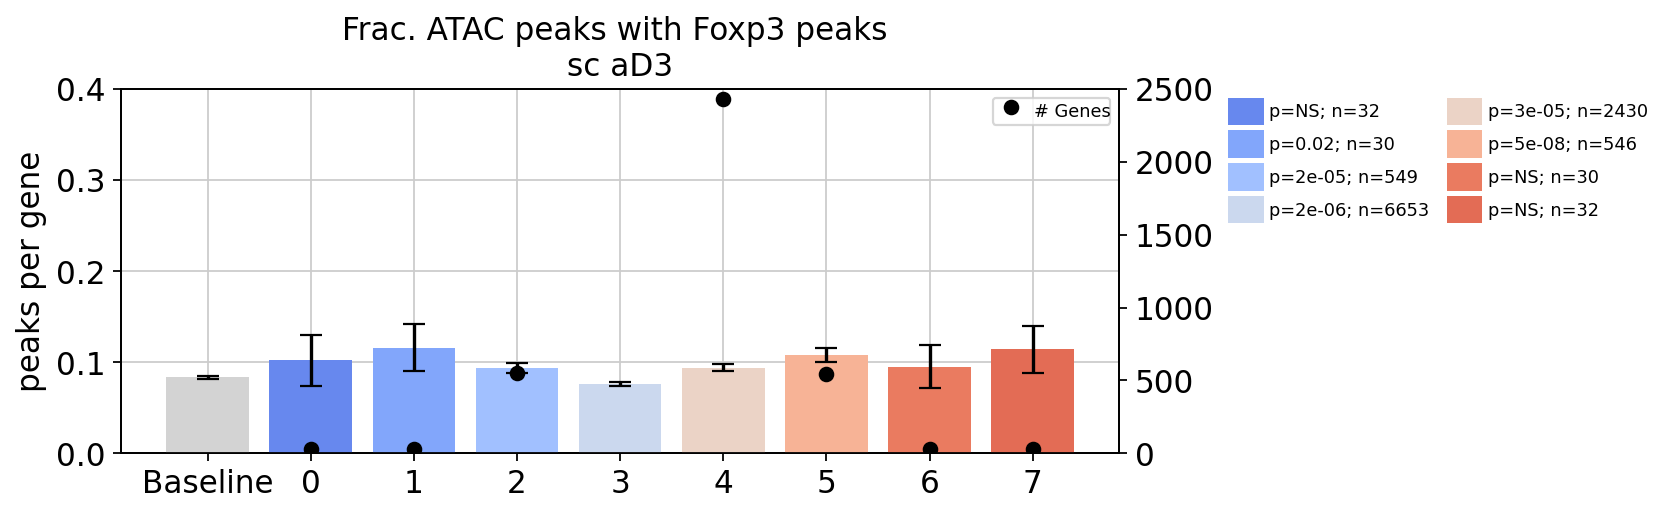

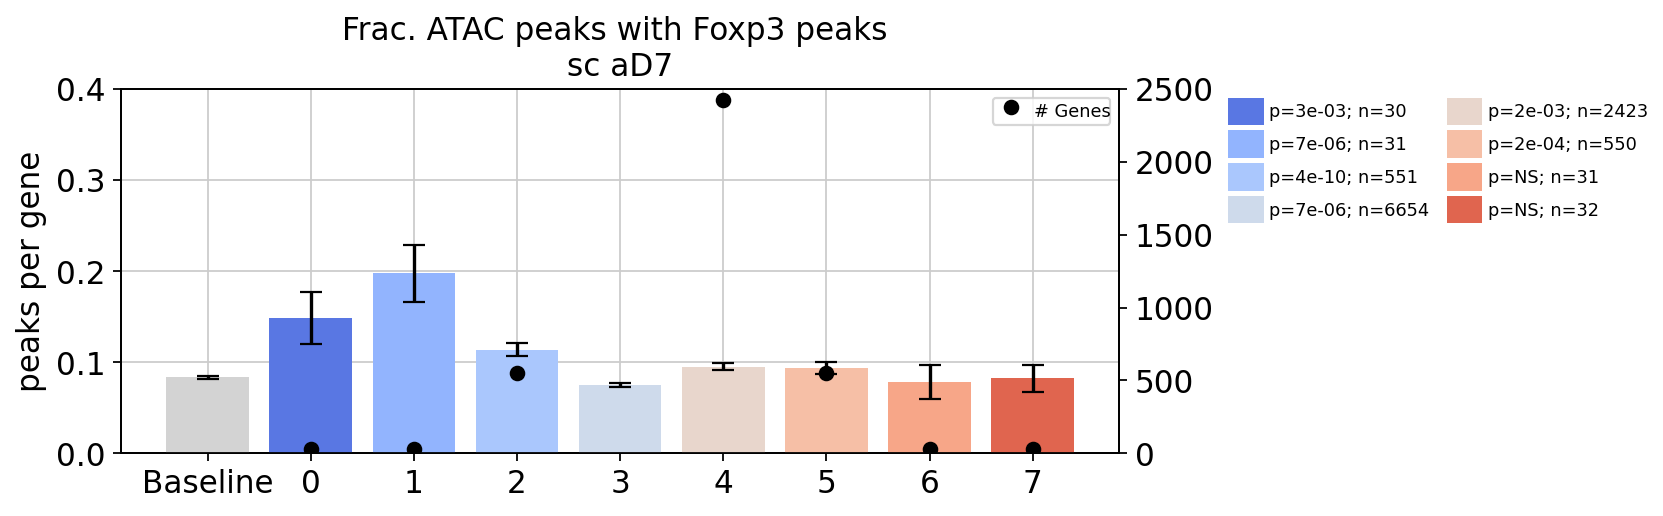

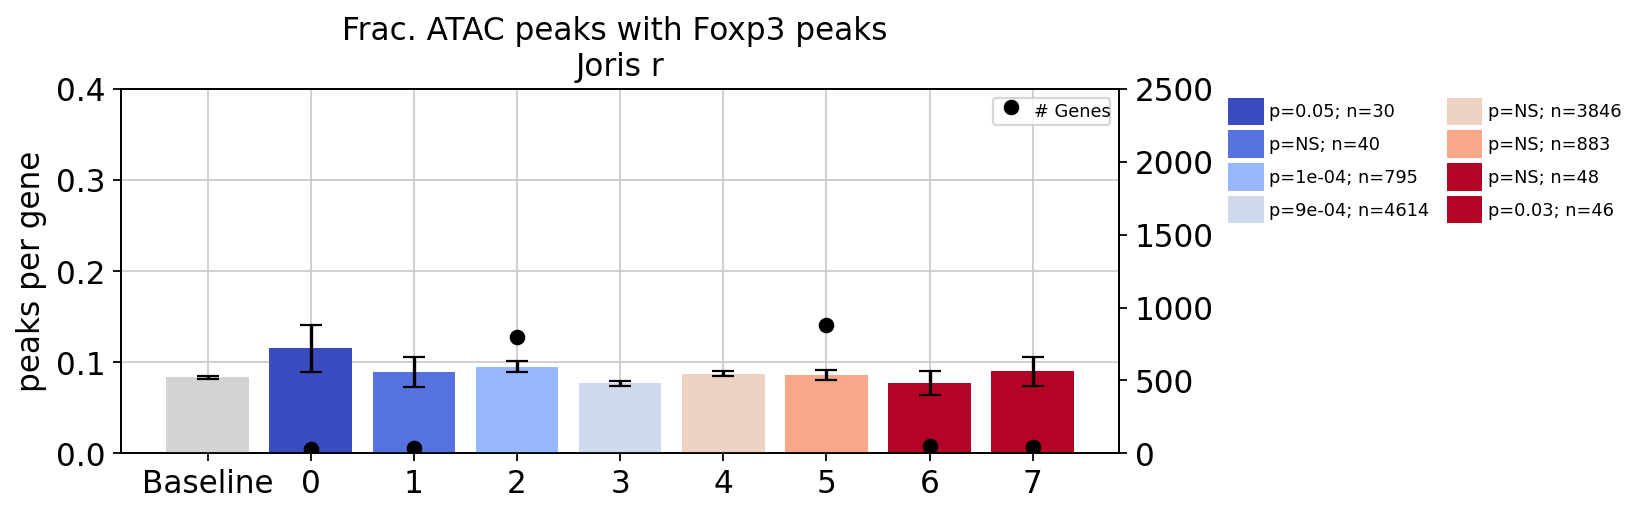

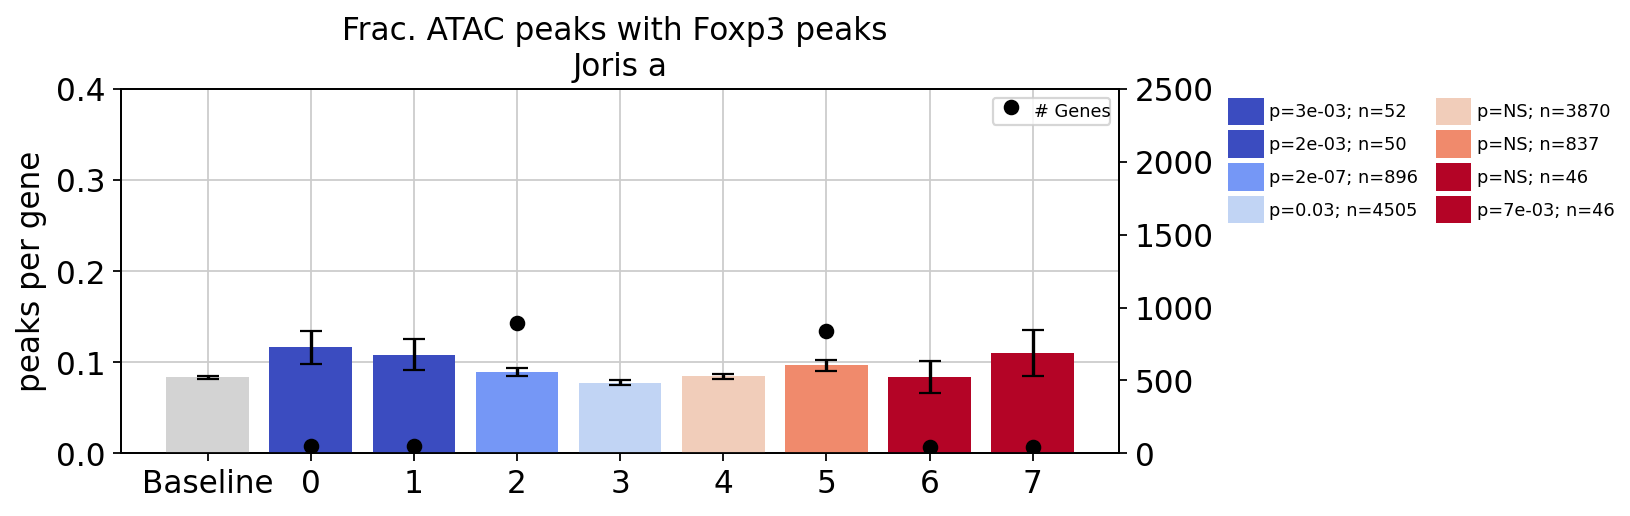

In [36]:
foxp3_peaks_per_atac = (foxp3_counts/atac_counts)
foxp3_peaks_per_atac = foxp3_peaks_per_atac.fillna(0)
plot_gene_module_barplots(wald_clusters, col_to_name, foxp3_count_set, 
                          foxp3_peaks_per_atac, wald_color_dict,
                          ymax=.4, prefix='foxp3_div_atac',
                         title = 'Frac. ATAC peaks with Foxp3 peaks')

#### Motif enrichment

Look for motif enrichment in these different gene clusters

In [38]:
from make_gene_modules import *
from matplotlib.colors import Normalize, LinearSegmentedColormap

atac_motif_df = pd.read_csv('./call_motifs/output/counts/previous_bulk_atac_peaks.csv', index_col = 0)
foxp3_motif_df = pd.read_csv('./call_motifs/output/counts/yuri_foxp3.csv', index_col = 0)
foxp3_motif_df = pd.read_csv('./call_motifs/output/counts/yuri_foxp3_Mus_musculus/yuri_foxp3_p=5e-05.csv', index_col = 0)
# foxp3_motif_df = pd.read_csv('./call_motifs/output/counts/yuri_foxp3_Homo_sapiens/yuri_foxp3_p=5e-05.csv', index_col = 0)


def make_foxp3_motif_enrichments(motif = 'Stat5a', wald_key = 'sc Rest'):
    rdf, ys, motif_freq_df = make_motif_enrichment(foxp3_to_closest_tss, wald_clusters, 
                                    wald_load_dict, foxp3_motif_df, wald_key = wald_key)
    
    plt.figure()
    sc  = scatter_with_pearson(arr(ys), motif_freq_df[motif].values,
                               plt.gca(),
                               s = wald_clusters[wald_key].value_counts().sort_index().values/2,
                               c = [wald_color_dict[wald_key][x] for x in wald_clusters[wald_key].value_counts().sort_index().index],
                               edgecolor='black', linewidth=.55, xloc = .45, fontsize=12
                              )
    add_xaxis_labels('WT', 'Tir1', plt.gca(), )
    plt.xlabel("Z-score of cluster")
    plt.ylabel("# Motifs")
    plt.title(f"{motif} motifs in Foxp3 peaks near DEGs")
    plt.gca().set_axisbelow(True)
    fig = plt.gcf()
    
    # Create the scatter plot with custom arguments
    scatter = plt.scatter([], [], c=[], cmap='coolwarm', vmin = -3, vmax=3)
    
    # Add colorbar
    new_cbar = plt.gca().inset_axes(transform = plt.gca().transAxes,
               bounds = (1.15, 0, .05, .2))
    plt.colorbar(scatter, cax=new_cbar)
    new_cbar.set_title('Z-score', ha='left')
    new_cbar.grid(False)
    
    
    # Desired sizes for the legend markers
    sizes = [10, 50, 100, 200]
    
    # Create custom handles for the legend
    # Here, we use mlines.Line2D to create circle markers with specified sizes
    handles = [mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                             markersize=np.sqrt(size), label=label)
               for size, label in zip(sizes, sizes)]
    
    # Add the custom legend to the plot
    plt.legend(handles=handles, bbox_to_anchor=(1, 1), loc='upper left', frameon = False, title='# DEGs')
    
    fig.savefig(f"./plots/gene_modules_foxp3_enrichment/{motif}_motifs_in_DEG_peaks.pdf", 
               bbox_inches='tight')    
    return rdf

from make_gene_modules import *
from matplotlib.colors import Normalize, LinearSegmentedColormap
def make_atac_motif_enrichments(motif = 'Stat5a'):
    wald_key = 'sc Rest'
    
    rdf, ys, motif_freq_df = make_motif_enrichment(atac_to_closest_tss, wald_clusters, 
                                    wald_load_dict, atac_motif_df, wald_key = wald_key)
    
    
    plt.figure()
    sc  = scatter_with_pearson(arr(ys), motif_freq_df[motif].values,
                               plt.gca(),
                               s = wald_clusters[wald_key].value_counts().sort_index().values/2,
                               c = [wald_color_dict[wald_key][x] for x in wald_clusters[wald_key].value_counts().sort_index().index],
                               edgecolor='black', linewidth=.55, xloc = .75, fontsize=12
                              )
    add_xaxis_labels('WT', 'Tir1', plt.gca(), )
    plt.xlabel("Z-score of cluster")
    plt.ylabel("# Motifs")
    plt.title(f"{motif} motifs in atac peaks near DEGs")
    plt.gca().set_axisbelow(True)
    fig = plt.gcf()
    
    # Create the scatter plot with custom arguments
    scatter = plt.scatter([], [], c=[], cmap='coolwarm', vmin = -3, vmax=3)
    
    # Add colorbar
    new_cbar = plt.gca().inset_axes(transform = plt.gca().transAxes,
               bounds = (1.15, 0, .05, .2))
    plt.colorbar(scatter, cax=new_cbar)
    new_cbar.set_title('Z-score', ha='left')
    new_cbar.grid(False)
    
    
    # Desired sizes for the legend markers
    sizes = [10, 50, 100, 200]
    
    # Create custom handles for the legend
    # Here, we use mlines.Line2D to create circle markers with specified sizes
    handles = [mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                             markersize=np.sqrt(size), label=label)
               for size, label in zip(sizes, sizes)]
    
    # Add the custom legend to the plot
    plt.legend(handles=handles, bbox_to_anchor=(1, 1), loc='upper left', frameon = False, title='# DEGs')
    
    # fig.savefig("./plots/gene_modules_atac_enrichment/Stat5_motifs_in_DEG_peaks.pdf", 
    #            bbox_inches='tight') 
    return rdf

Calculate motif enrichment for each wald_key (here done just for sc rD7)

In [39]:
wald_keys = ['sc rD7']
n = len(wald_keys)
all_lfc_dfs = []
all_pval_dfs = []
for c, wald_key in enumerate(wald_keys):
    from make_gene_modules import make_motif_counts
    rdf_foxp3 = make_motif_counts(foxp3_to_closest_tss, wald_clusters, foxp3_motif_df, wald_key = wald_key)
    
    
    rows = []
    background = pd.concat(rdf_foxp3, axis=0)
    for _, df in enumerate(rdf_foxp3):
        for col in df:
            stat, p = scipy.stats.fisher_exact([
                       [(df[col]).sum(), (df[col]==0).sum()],
                       [background[col].sum(), (background[col]==0).sum()]])
            delta = np.log2(df[col].mean()/background[col].mean())
            rows.append([col, f'{qs[_]}-{qs[_+1]}', delta, p])
    motif_lfc_df = pd.DataFrame(rows, columns = ['motif', 'cluster', 'delta', 'p']).pivot(index='motif', columns='cluster', values='delta').fillna(0)
    motif_lfc_df[np.isinf(motif_lfc_df)] = 0
    motif_pval_df = pd.DataFrame(rows, columns = ['motif', 'cluster', 'delta', 'p']).pivot(index='motif', columns='cluster', values='p').fillna(1)
    all_lfc_dfs.append(motif_lfc_df)
    all_pval_dfs.append(motif_pval_df)


/tmp/ipykernel_2370219/3147291136.py:17: RuntimeWarning: divide by zero encountered in log2
  delta = np.log2(df[col].mean()/background[col].mean())


Plot these motif enrichments as a dot plot

/tmp/ipykernel_2370219/3531797565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lfc_data[pval_data.values < .5] = 0
/tmp/ipykernel_2370219/3531797565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lfc_data[pval_data.values < .5] = 0


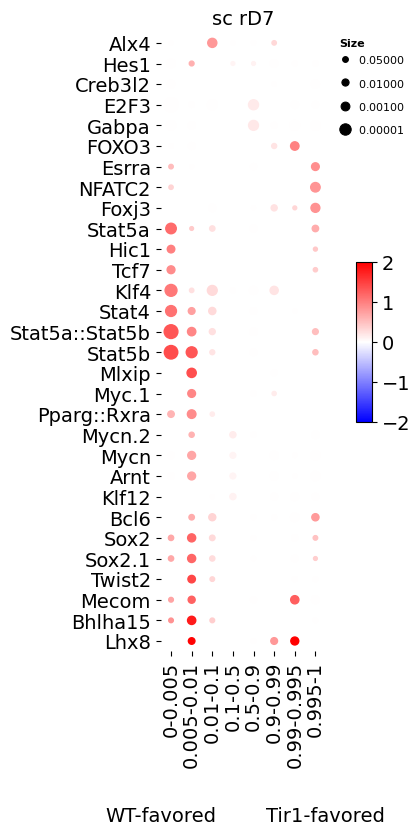

In [40]:
inds = []
fig, axs = init_subplots_exact(n, 1, fgsz=(3, 8), dpi = 50, xspace=1.4, as_list=True)
for c, (motif_lfc_df, motif_pval_df) in enumerate(zip(all_lfc_dfs, all_pval_dfs)):
    idx = ((motif_pval_df < .01) & (motif_lfc_df.abs() > .8)).any(axis=1)
    pval_data = -np.log10(motif_pval_df.loc[idx])
    lfc_data = motif_lfc_df.loc[idx]
    pval_data[pval_data.values < .5] = 0
    lfc_data[pval_data.values < .5] = 0
    o, _ = make_order_and_cluster_optimal(lfc_data, n_clusters=20)
    pval_data = pval_data.iloc[o]
    lfc_data = lfc_data.iloc[o]
    lfc_data[lfc_data <= 0] = 0 
    plt.sca(axs[c])
    f = mv.dot_heatmap(pval_data, lfc_data,
                       yticklabels=lfc_data.index,
                       xticklabels=motif_lfc_df.columns,
                       dot_size_legend_kw={"title": "Size"}, dot_cmap='bwr',
                       dot_norm = matplotlib.colors.Normalize(vmin=-2, vmax=2),
                       sizes = (0, 100),
                       ax=plt.gca(),
    )
    plt.title(wald_keys[c])

for ax in axs:
    ax.grid(False)
add_xaxis_labels('WT-favored', 'Tir1-favored', plt.gca(), y=-.25)

In [41]:
def get_irea_genes_for_cytokine(cytokine = 'IL-2'):
    subdf = treg_irea_genesets[treg_irea_genesets['Cytokine']==cytokine]
    treg_up = subdf['Gene'][subdf['Avg_log2FC'] > 0]
    treg_down = subdf['Gene'][subdf['Avg_log2FC'] < 0]
    treg_up = treg_up[treg_up.isin(lfc_df_all.index)]
    treg_down = treg_down[treg_down.isin(lfc_df_all.index)]
    return treg_up, treg_down

In [42]:
treg_irea_genesets = pd.read_csv('bulk_rna_data/irea/Treg_DEGs_IREA.csv')
treg_irea_genesets = treg_irea_genesets[treg_irea_genesets['FDR'] < .001]

rows = []
for cytokine in treg_irea_genesets.value_counts("Cytokine").sort_values(ascending=False).iloc[:40].index:
    up_genes, down_genes = get_irea_genes_for_cytokine(cytokine)
    if (len(up_genes)  <= 3) or (len(down_genes)  <= 3):
        continue
    for col in wei_sc_cols_d0 + wei_sc_cols_d3 + wei_sc_cols_d7 + wei_cols + joris_cols:
        x = lfc_df_all.loc[up_genes, col]
        y = lfc_df_all.loc[down_genes, col]
        delta = np.nanmean(x) - np.nanmean(y)
        p = nonan_test(x, y)[1]
        rows.append([cytokine, col, delta, p])

In [43]:
IREA_pval_df = pd.DataFrame(rows).pivot(index=0, columns=1, values=3)
IREA_lfc_df = pd.DataFrame(rows).pivot(index=0, columns=1, values=2)

IREA_pval_df[IREA_pval_df > .05] = np.nan

bad = IREA_pval_df.isna().all(axis=1) | IREA_lfc_df.isna().all(axis=1)

IREA_pval_df = IREA_pval_df.loc[~bad]
IREA_lfc_df = IREA_lfc_df.loc[~bad]

In [44]:
cols = ['joris_activated_Foxp3_GFPKO_vs_activated_Treg_GFP_DTR_WT',
       'joris_resting_Foxp3_GFPKO_vs_resting_Treg_GFP_DTR_WT',
       'joris_CD73__Thymic_Foxp3_GFPKO_vs_CD73__Thymic_Treg',
       'wei_Thymus.TIR1.Developing_vs_Thymus.WT.Developing',
       'sc_rest_D3_tir1_vs_D3_wt',
       'sc_rest_D7_tir1_vs_D7_wt',
       'wei_SpleenLN.TIR1.Resting_vs_SpleenLN.WT.Resting',
       'sc_active_D3_tir1_vs_D3_wt',
       'wei_SpleenLN.TIR1.Activated_vs_SpleenLN.WT.Activated',
       'sc_active_D7_tir1_vs_D7_wt', 
       'sc_active_D0_tir1_vs_D0_wt', 'sc_rest_D0_tir1_vs_D0_wt'
]
stat_data = IREA_lfc_df.fillna(0)
pval_data = IREA_pval_df.fillna(1)

motifo, _, _ = make_order_and_cluster_custom(stat_data)
# colo, _, _ = make_order_and_cluster_custom(stat_data.T)
stat_data[pval_data==1] = 0

pval_data, stat_data = pval_data.iloc[motifo, colo], stat_data.iloc[motifo, colo]
f = mv.dot_heatmap(-np.log10(pval_data.clip(1e-4)), stat_data, yticklabels=stat_data.index,
                   xticklabels=[col_to_name.get(x, x) for x in stat_data.columns],
#                    size_norm = colors.LogNorm(),
                   dot_size_legend_kw={"title": "Size"}, dot_cmap='bwr',
                   dot_norm = matplotlib.colors.Normalize(vmin=-1, vmax=1),
                   sizes = (1, 100),
)
plt.grid(False)

2


NameError: name 'colo' is not defined

#### Get binding at promoters

Here we are plotting Foxp3 binding at promoteres for different DEG lists, and also the gene clusters plotted above

In [45]:
def get_gene_tss(gene, tss_df):
    gene_df = pd.DataFrame()
    if gene not in tss_df.index:
        return None
    all_tss = tss_df.loc[[gene]]
    if len(all_tss) == 0:
        return None
    start = all_tss['start'].median()
    end = all_tss['end'].median()
    chrom = all_tss['chrom'][0]
    return [chrom, start, end]

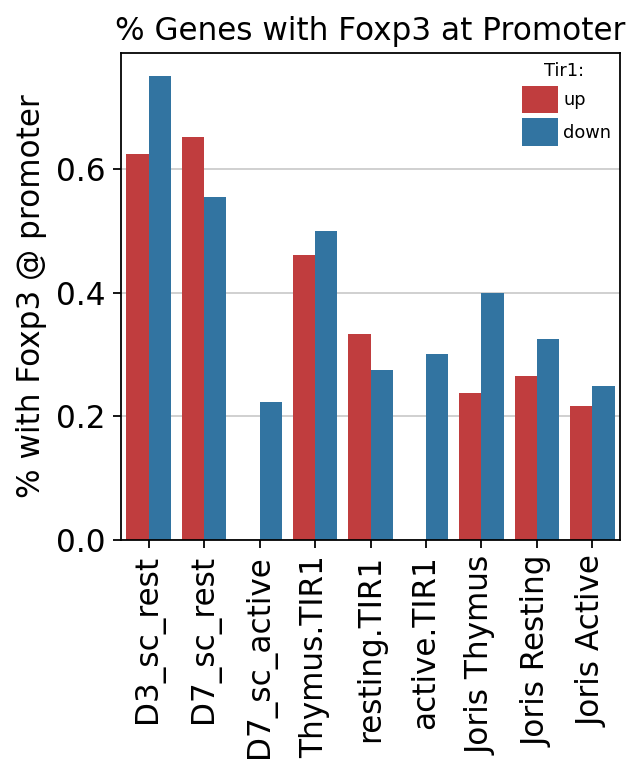

In [46]:
n_dict = {}
v_vals = []
for key in wei_sc_cols_d3 + wei_sc_cols_d7 + wei_cols + joris_cols:
    rows = []
    genes_up = lfc_df_all.index[(lfc_df_all[key] > 0) & (pval_df_all[key] < .05)]
    for gene in genes_up:
        row = get_gene_tss(gene, tss_df.set_index('gene_name'))
        if row is None:
            continue
        row = list(make_int(row)) + [gene]
        rows.append(row)
    if len(rows) > 0:
        slopped_tss = pbt.BedTool(rows).slop(b=2_500, genome='mm10')
        v = get_col(slopped_tss.intersect(foxp3_bedtool_liftover, c=True), -1).astype(float)
        v_vals.append([key, 'up', np.mean(v), np.mean(v>0), len(v)])
        n_dict[(key, 'up')] = pd.Series(v, index=get_col(rows, -1))
    
    rows = []
    genes_down = lfc_df_all.index[(lfc_df_all[key] < 0) & (pval_df_all[key] < .05)]
    for gene in genes_down:
        row = get_gene_tss(gene, tss_df.set_index('gene_name'))
        if row is None:
            continue
        row = list(make_int(row)) + [gene]
        rows.append(row)
    if len(rows) > 0:
        slopped_tss = pbt.BedTool(rows).slop(b=2_500, genome='mm10')
        v = get_col(slopped_tss.intersect(foxp3_bedtool_liftover, c=True), -1).astype(float)
        v_vals.append([key, 'down', np.mean(v), np.mean(v>0), len(v)])
        n_dict[(key, 'down')] = pd.Series(v, index=get_col(rows, -1))


promoter_vals = pd.DataFrame(v_vals, columns=['condition', 'direction', 'sum', 'mean', 'n_genes'])
promoter_vals['condition'] = [col_to_name[x] for x in promoter_vals['condition']]

sns.barplot(data=promoter_vals, x='condition', hue='direction',y='mean',
           palette=['tab:red', 'tab:blue'])
plt.xticks(rotation=90)
plt.xlabel("")
plt.gca().set_axisbelow(True)
plt.ylabel("% with Foxp3 @ promoter")
plt.title("% Genes with Foxp3 at Promoter")
plt.legend(title = "Tir1: ")

In [47]:
n_dict = {}
v_vals = []
wald_key = 'sc rD7'
for u in np.unique(wald_clusters[wald_key]):
    rows = []
    genes_up = wald_clusters.index[wald_clusters[wald_key] == u]
    for gene in genes_up:
        row = get_gene_tss(gene, tss_df.set_index('gene_name'))
        if row is None:
            continue
        row = list(make_int(row)) + [gene]
        rows.append(row)
    if len(rows) > 0:
        slopped_tss = pbt.BedTool(rows).slop(b=2_500, genome='mm10')
        v = get_col(slopped_tss.intersect(foxp3_bedtool_liftover, c=True), -1).astype(float)
        v_vals.append([u, 'up', np.mean(v), np.mean(v>0), len(v)])
        n_dict[(u, 'up')] = pd.Series(v, index=get_col(rows, -1))


/tmp/ipykernel_2370219/3313408780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promoter_vals, x='condition',  y='mean',


(-1.0, 8.0)

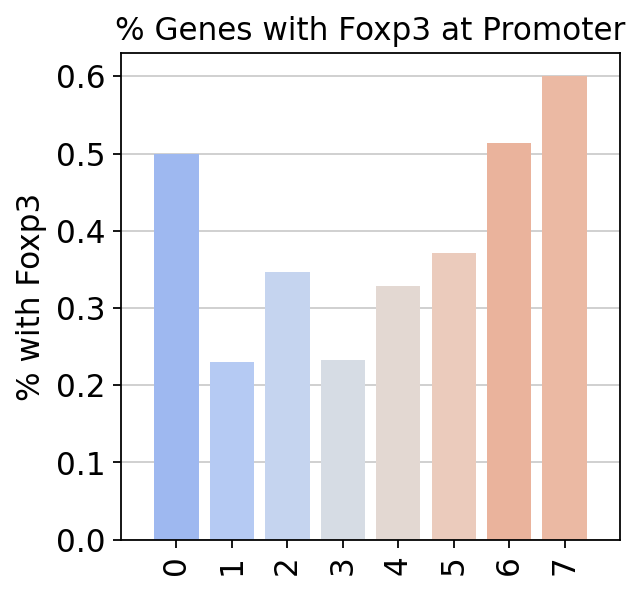

In [48]:
promoter_vals = pd.DataFrame(v_vals, columns=['condition', 'direction', 'sum', 'mean', 'n_genes'])
promoter_vals['condition'] = promoter_vals['condition'].astype(int)

sns.barplot(data=promoter_vals, x='condition',  y='mean',
           palette=[wald_color_dict['sc rD7'][x] for x in promoter_vals.index])
plt.xticks(rotation=90)
plt.xlabel("")
plt.gca().set_axisbelow(True)
plt.ylabel("% with Foxp3")
plt.title("% Genes with Foxp3 at Promoter")
plt.xlim(-1, 8)

#### Intronic Foxp3 

In [49]:
v_vals = []
wald_key = 'sc rD7'
for u in np.unique(wald_clusters[wald_key].dropna()):
    rows = []
    genes_up = wald_clusters.index[wald_clusters[wald_key] == u]
    v = genes_up.isin(foxp3_intron_overlap['gene'])
    v_vals.append([u, 'up', np.mean(v), np.mean(v>0), len(v)])

/tmp/ipykernel_2370219/1054415468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promoter_vals, x='condition',  y='mean',


(-1.0, 8.0)

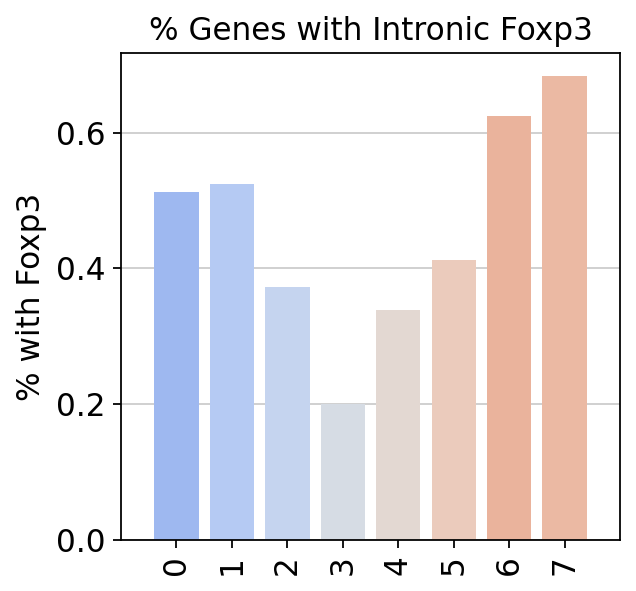

In [50]:
promoter_vals = pd.DataFrame(v_vals, columns=['condition', 'direction', 'sum', 'mean', 'n_genes'])
promoter_vals['condition'] = promoter_vals['condition'].astype(int)

sns.barplot(data=promoter_vals, x='condition',  y='mean',
           palette=[wald_color_dict['sc rD7'][x] for x in promoter_vals.index])
plt.xticks(rotation=90)
plt.xlabel("")
plt.gca().set_axisbelow(True)
plt.ylabel("% with Foxp3")
plt.title("% Genes with Intronic Foxp3")
plt.xlim(-1, 8)

#### Make CDF Plot

Here we are plotting LFC-CDF plots as a function of Foxp3 peaks, showing that there is not a general pattern.

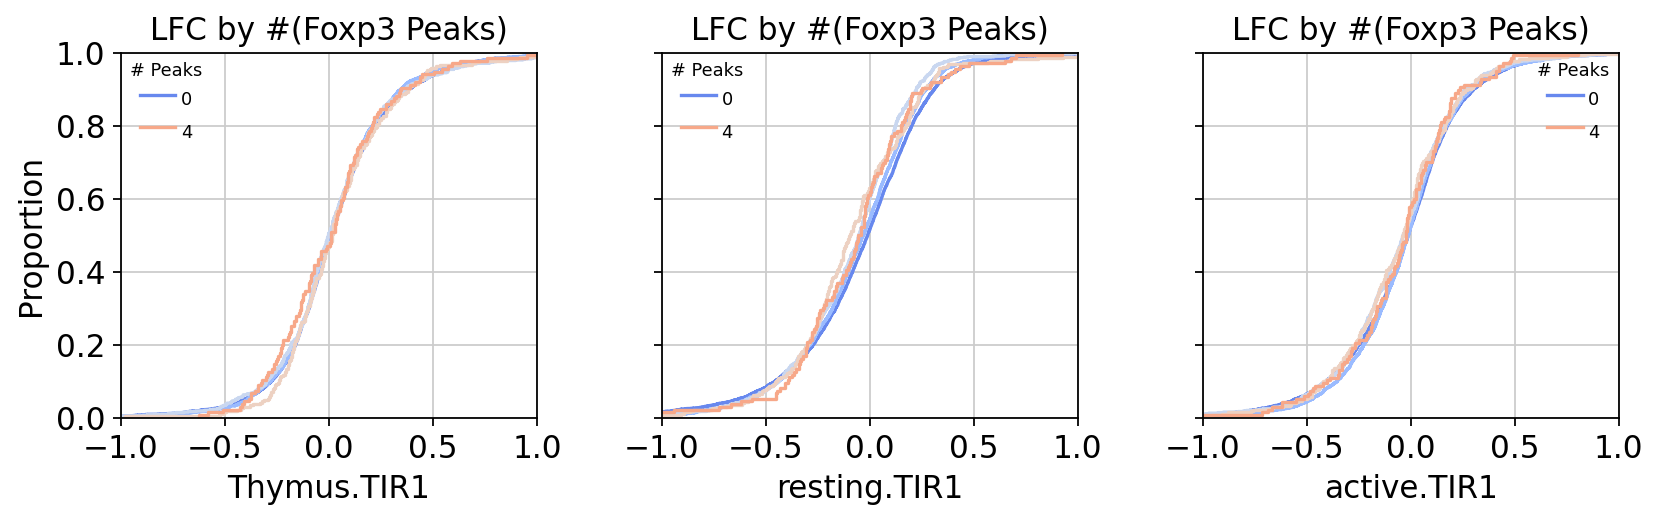

In [51]:
co = 4
us = foxp3_counts.copy()
us[us > co] = co
us = np.unique(us)
n = len(us)
colors = sns.color_palette('coolwarm', n_colors = n+1, )
fig, axs = init_subplots(3, 1, space=.3, sharey=True, fgsz=(4, 3))
for _, col in enumerate(wei_cols):
    for c, u in enumerate(us):
        v = foxp3_counts.index[foxp3_counts==u]
        v = v[v.isin(lfc_df_all.index)]
        plt.sca(axs[_])
        sns.ecdfplot(lfc_df_all.loc[v, col], c=colors[c])
        plt.xlim([-1, 1])
        plt.xlabel(col_to_name[col])
        plt.title("LFC by #(Foxp3 Peaks)")
    plt.plot([0], [0], color=colors[0], label=0)
    plt.plot([0], [0], color=colors[n-1], label=co)
    plt.legend(title="# Peaks")

#### REINTRO from BULK CLUSTER

Here we are plotting our gene clusters from above onto foxp3 reintroduction data

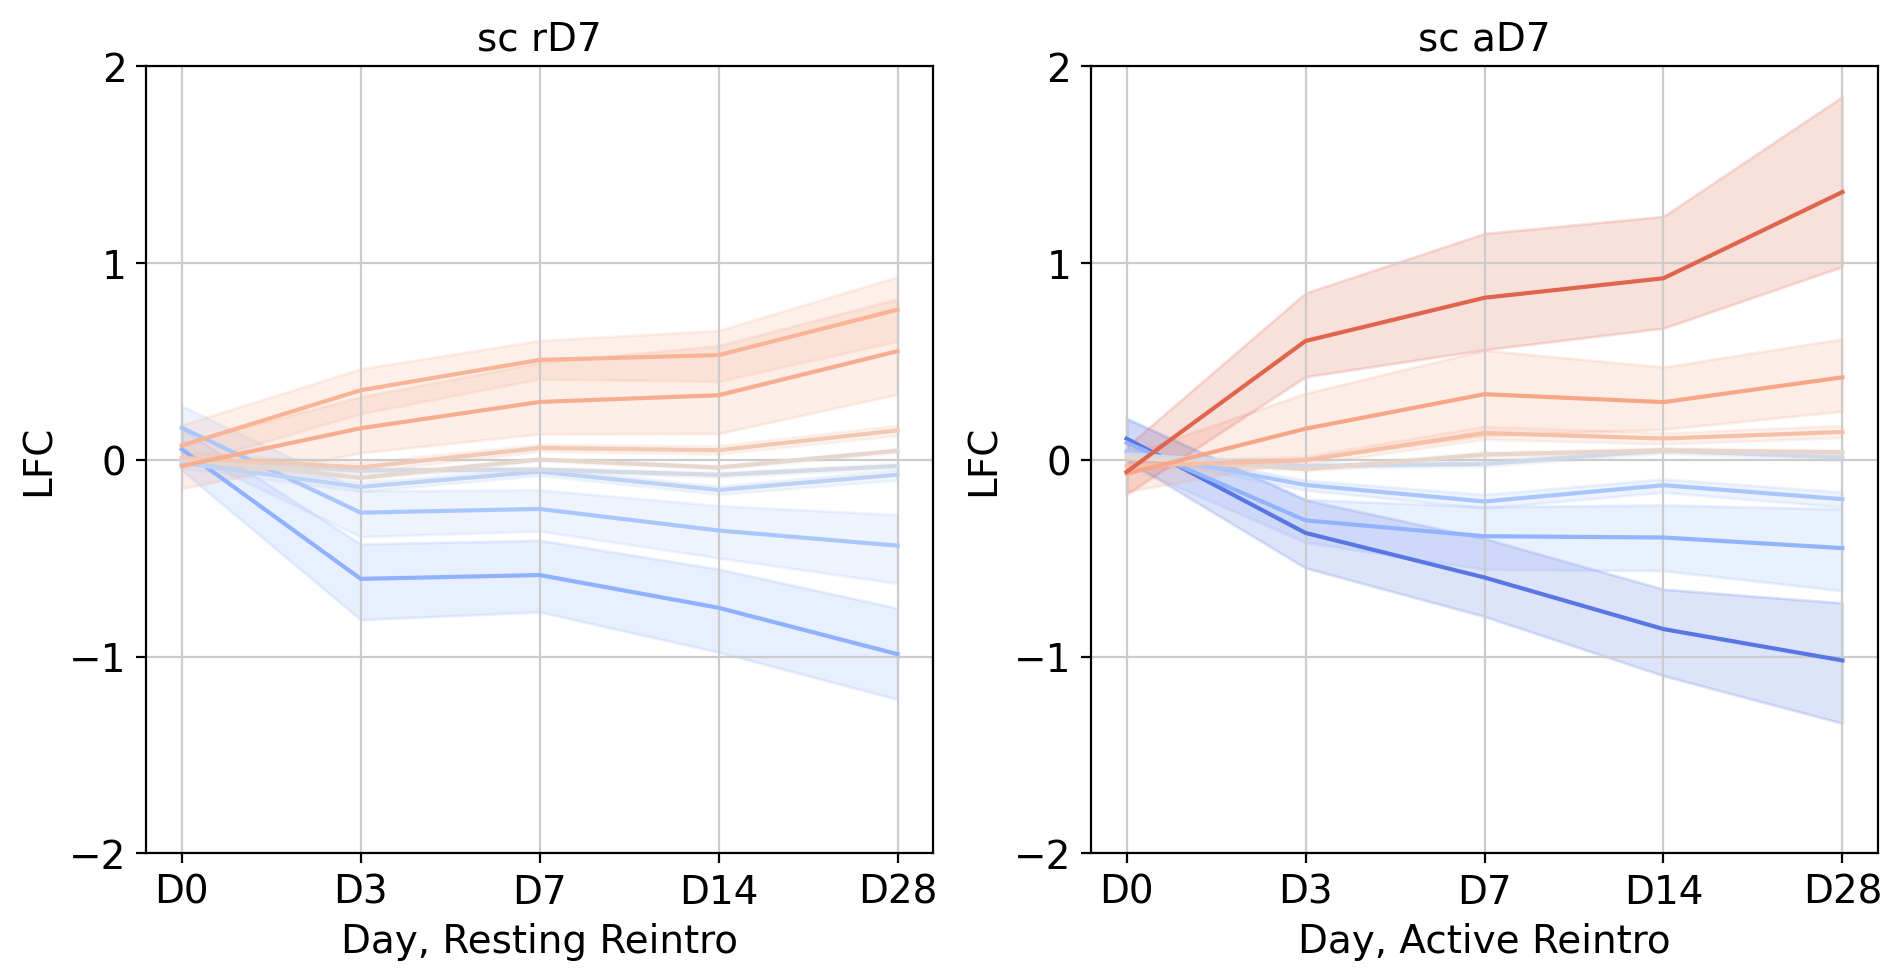

In [52]:
%autoreload 2
from make_gene_modules import *
cols = [
    ['sc rD7', resting_reintro_cols, 'Resting'],
    ['sc aD7', active_reintro_cols, 'Active'],
]
plot_genemodules_on_reintro_data(cols, wald_clusters, basemean_df_all, 
                                 lfc_df_all, col_to_name, wald_color_dict, basemean_co = 0)

## Reintro_FC_Plot

Here we are plotting an FC-FC plot for the Foxp3 reintroduction data 

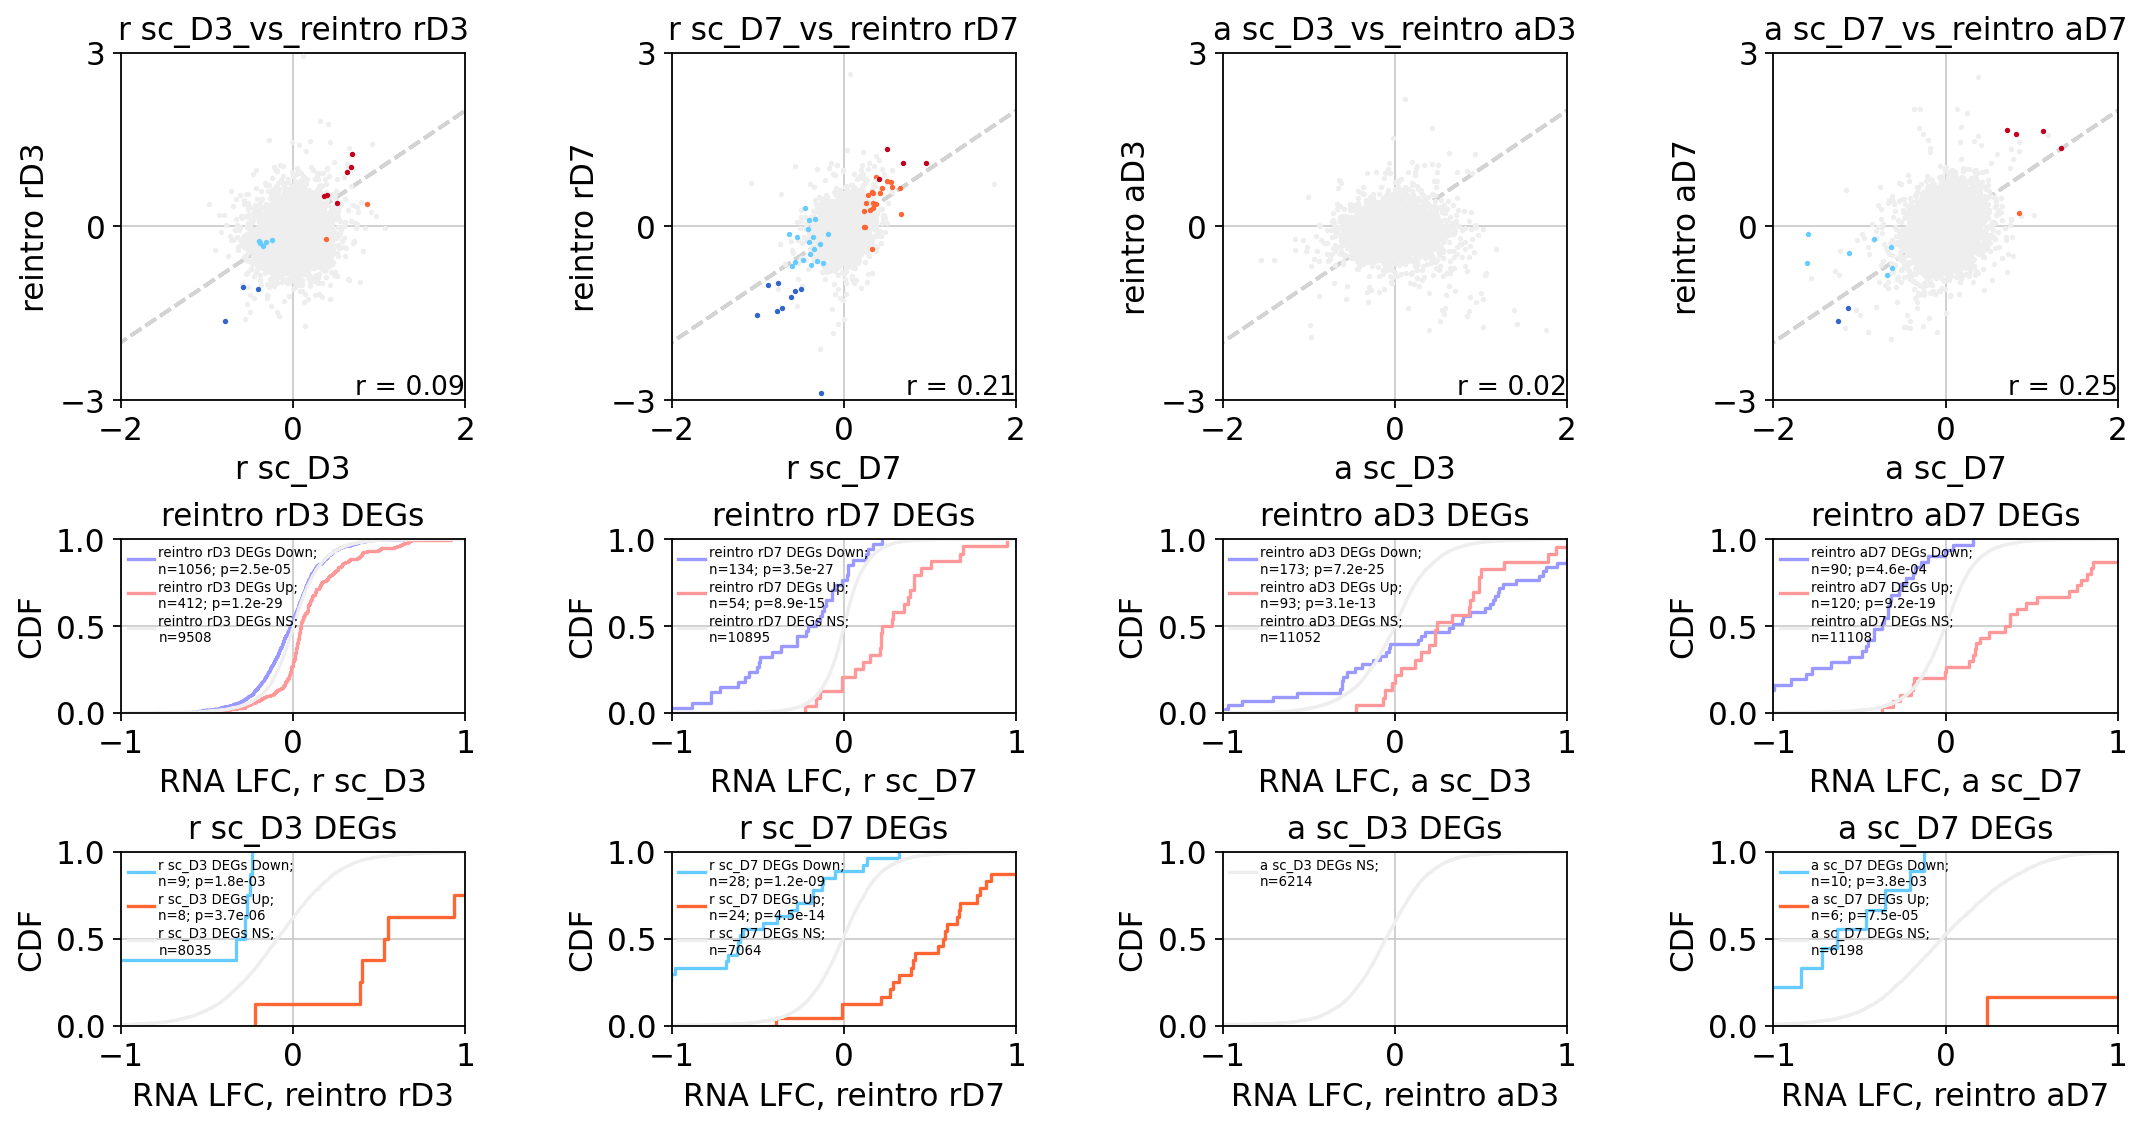

In [53]:
%autoreload 2
from plot_bulk_RNA import *

comparisons = {
    'r sc_D3_vs_reintro rD3' : ['sc_rest_D3_tir1_vs_D3_wt', 'weiReintro_nKIKO.3.0.n_vs_nKIKO.3.0.p',],
    'r sc_D7_vs_reintro rD7' : ['sc_rest_D7_tir1_vs_D7_wt', 'weiReintro_nKIKO.7.0.n_vs_nKIKO.7.0.p',],
    'a sc_D3_vs_reintro aD3' : ['sc_active_D3_tir1_vs_D3_wt',  'weiReintro_aKIKO.3.0.n_vs_aKIKO.3.0.p',],
    'a sc_D7_vs_reintro aD7' : ['sc_active_D7_tir1_vs_D7_wt',  'weiReintro_aKIKO.7.0.n_vs_aKIKO.7.0.p',],

    

}

ylimdict = {
    'r sc_D3_vs_reintro rD3' : [-3, 3],
    'r sc_D7_vs_reintro rD7' : [-3, 3],
    'a sc_D3_vs_reintro aD3' : [-3, 3],
    'a sc_D7_vs_reintro aD7' : [-3, 3],
}

f = plot_bulk_fc_fc_and_cdf_plot(comparisons, lfc_df_all, pval_df_all, basemean_df_all, ylimdict = ylimdict,
                                 basemean_co = 0,
                                ylabel = 'Reintro: N / P', second_label='Reintro N')
f.savefig('./plots/degradation_vs_ko_figure2d.pdf', bbox_inches = 'tight')

### Are the DEGs more likely to be TFs?

Here we are plotting whether the genes from our clusters are enriched for being TFs

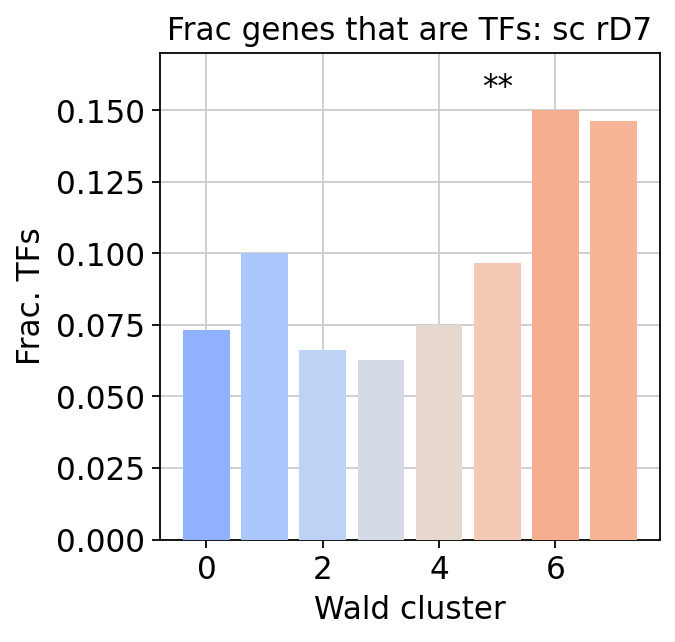

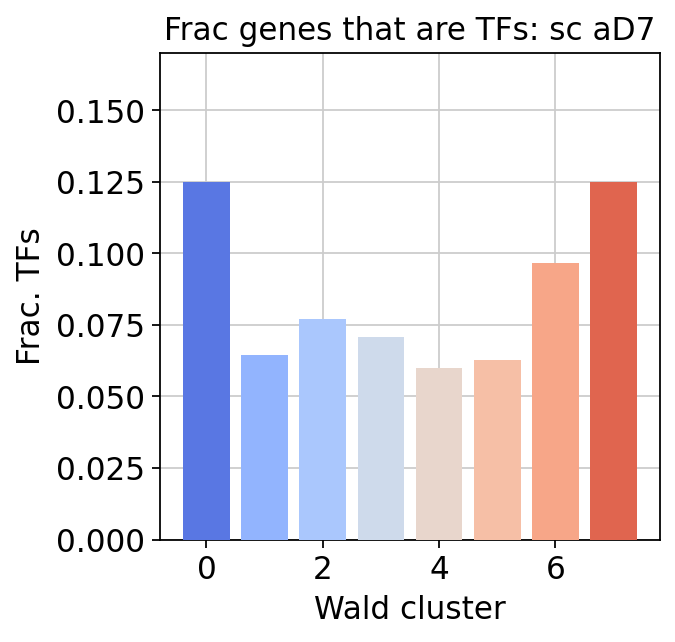

In [54]:
from aux_functions import *

#### ONE OF THESE:
mouse_tfs = pd.read_csv('./tfdb/Mus_musculus_TF', sep = '\t')
mouse_tfs = mouse_tfs.set_index('Symbol')

for wald_key in ['sc rD7', 'sc aD7']:
    xs = []
    ys = []
    ps = []
    for u in np.unique(wald_clusters[wald_key].dropna()):
        idx = wald_clusters[wald_key] == u
        genes = wald_clusters[wald_key].index[idx]
        frac = np.mean(genes.isin(mouse_tfs.index))
        
        is_tf = np.sum(genes.isin(mouse_tfs.index))
        no_tf = np.sum(~genes.isin(mouse_tfs.index))
        is_tf_all = np.sum(wald_clusters[wald_key].dropna().index.isin(mouse_tfs.index))
        no_tf_all = np.sum(~wald_clusters[wald_key].dropna().index.isin(mouse_tfs.index))
        stat, p = scipy.stats.fisher_exact([[is_tf, no_tf], [is_tf_all, no_tf_all]])

        xs.append(int(u))
        ys.append(frac)
        ps.append(p)
    plt.figure()
    plt.bar(xs, ys, zorder=3, color = [wald_color_dict[wald_key][x] for x in xs])
    for c, p in enumerate(ps):
        pstr = format_pval_as_asterisks(p, nsstr = '')
        plt.text(c, .155, pstr, ha='center')
    plt.ylabel("Frac. TFs")
    plt.title(f"Frac genes that are TFs: {wald_key}")
    plt.xlabel("Wald cluster")
    plt.ylim([0, .17])

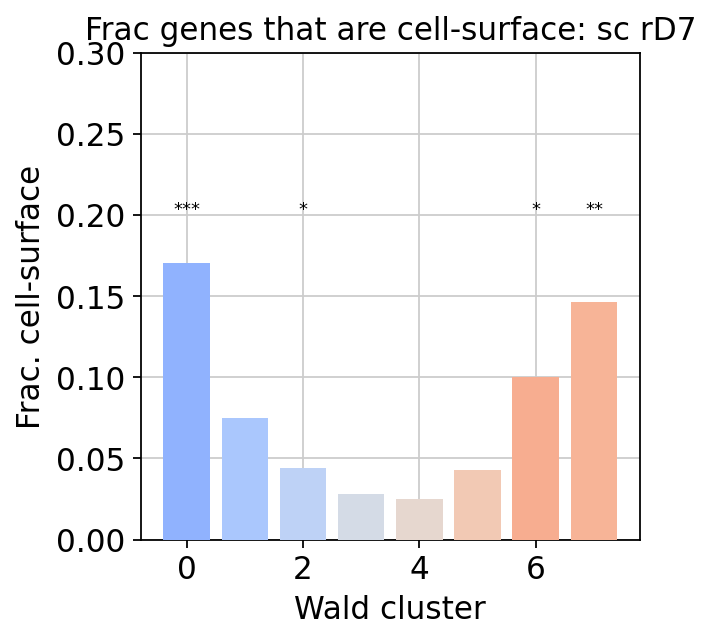

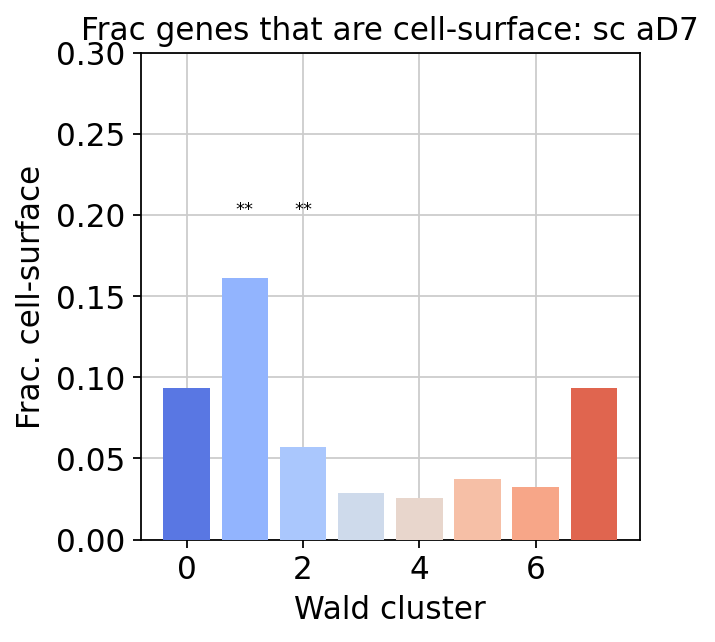

In [55]:
from aux_functions import *
format_pval_as_asterisks
#### ONE OF THESE:
surface_prots = pd.read_csv('./annotations/Surface_receptors.csv', sep = ',')
surface_prots = surface_prots.dropna().set_index('ENTREZ gene symbol')

for wald_key in ['sc rD7', 'sc aD7'#, 'Joris Rest', 'Joris Act'
                ]:
    xs = []
    ys = []
    ps = []
    for u in np.unique(wald_clusters[wald_key].dropna()):
        
        idx = wald_clusters[wald_key] == u
        genes = wald_clusters[wald_key].index[idx]

        frac = np.mean(genes.isin(surface_prots.index))        
        is_tf = np.sum(genes.isin(surface_prots.index))
        no_tf = np.sum(~genes.isin(surface_prots.index))
        is_tf_all = np.sum(wald_clusters[wald_key].dropna().index.isin(surface_prots.index))
        no_tf_all = np.sum(~wald_clusters[wald_key].dropna().index.isin(surface_prots.index))
        stat, p = scipy.stats.fisher_exact([[is_tf, no_tf], [is_tf_all, no_tf_all]])

        xs.append(int(u))
        ys.append(frac)
        ps.append(p)
    plt.figure()
    plt.bar(xs, ys, zorder=3, color = [wald_color_dict[wald_key][x] for x in xs])
    for c, p in enumerate(ps):
        pstr = format_pval_as_asterisks(p, nsstr = '')
        plt.text(c, .2, pstr, ha='center', fontsize=8)
    plt.ylabel("Frac. cell-surface")
    plt.title(f"Frac genes that are cell-surface: {wald_key}")
    plt.xlabel("Wald cluster")
    plt.ylim([0, .3])